In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.float_format', '{:0.3f}'.format)

In [3]:
# Set ipython's max row display
pd.set_option('display.max_row', 500)

# Set iPython's max column width to 100
pd.set_option('display.max_columns', 100)

In [4]:
consumer = pd.read_csv('Data/ConsumerElectronics.csv')

In [5]:
consumer.head()

fsn_id           order_date  Year  Month             order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10 3419300926147000.000   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10 1420830839915200.000   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10 2421912925714800.000   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10 4416592101738400.000   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10 4419525153426400.000   

         order_item_id   gmv  units deliverybdays deliverycdays  \
0 3419300926147000.000  6400      1            \N            \N   
1 1420830839915200.000  6900      1            \N            \N   
2 2421912925714800.000  1990      1            \N            \N   
3 4416592101738400.000  1690      1            \N            \N   
4 4419525153426400.000  1618      1            \N            \N   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        COD    5  -1.01299130778588E+018   
1                        COD    7  -8.99032457905512E+018   
2                        COD   10   -1.0404429420466E+018   
3                    Prepaid    4  -7.60496084352714E+018   
4                    Prepaid    6    2.8945572083453E+018   

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018                              CE   
1   7.33541149097431E+018                              CE   
2  -7.47768776228657E+018                              CE   
3  -5.83593163877661E+018                              CE   
4   5.34735360997242E+017                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod         7190                        0  
1              CameraTripod         7190                        0  
2              CameraTripod         2099                        3  
3              CameraTripod         2099                        3  
4              CameraTripod         2099                        3

In [6]:
consumer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [7]:
# Checking for normal distribution for numeric datatype
consumer.describe(percentiles = [0.25, 0.5, 0.75, 0.90, 0.99, 0.999])

Year       Month             order_id          order_item_id  \
count 1648824.000 1648824.000          1648824.000            1648824.000   
mean     2015.519       6.586 2842444674146622.000  13756277530325592.000   
std         0.500       3.623 1269134332596903.500  55945981798628056.000   
min      2015.000       1.000         76331515.000          108016495.000   
25%      2015.000       3.000 1602588503969575.000   1606725138262300.000   
50%      2016.000       6.000 2611824528743350.000   2619185472741150.000   
75%      2016.000      10.000 3610613539366250.000   4397705931628400.000   
90%      2016.000      11.000 4520541993801910.000   4561094519921880.000   
99%      2016.000      12.000 4626530348261358.000 300037347714467776.000   
99.9%    2016.000      12.000 4639920775381027.000 300037347717600000.000   
max      2016.000      12.000 5395076790260600.000 300037347717704000.000   

            units         sla  product_mrp  product_procurement_sla  
count 1648824.000 1648824.000  1648824.000              1648824.000  
mean        1.022       5.688     4108.309                    5.403  
std         0.254       2.983     8510.918                   53.466  
min         1.000       0.000        0.000                   -1.000  
25%         1.000       4.000      799.000                    1.000  
50%         1.000       6.000     1599.000                    2.000  
75%         1.000       7.000     3499.000                    3.000  
90%         1.000       9.000     7120.000                    5.000  
99%         2.000      13.000    45990.000                   13.000  
99.9%       4.000      17.000    54950.000                 1000.000  
max        50.000    1006.000   299999.000                 1000.000

In [8]:
consumer.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [9]:
consumer.replace(r'^\s+$', np.nan, regex=True, inplace = True)
consumer.replace('\\N', np.nan, inplace = True)

In [10]:
# let's check the null percentage for each column
round(100*(consumer.isnull().sum()/len(consumer.index)), 2)

fsn_id                             0.000
order_date                         0.000
Year                               0.000
Month                              0.000
order_id                           0.000
order_item_id                      0.000
gmv                                0.300
units                              0.000
deliverybdays                     79.630
deliverycdays                     79.630
s1_fact.order_payment_type         0.000
sla                                0.000
cust_id                            0.300
pincode                            0.300
product_analytic_super_category    0.000
product_analytic_category          0.000
product_analytic_sub_category      0.000
product_analytic_vertical          0.350
product_mrp                        0.000
product_procurement_sla            0.000
dtype: float64

In [11]:
#removing null valued GMV
consumer = consumer.loc[~(consumer.gmv.isnull())]

In [12]:
# let's check the null percentage for each column again
round(100*(consumer.isnull().sum()/len(consumer.index)), 2)

fsn_id                             0.000
order_date                         0.000
Year                               0.000
Month                              0.000
order_id                           0.000
order_item_id                      0.000
gmv                                0.000
units                              0.000
deliverybdays                     79.570
deliverycdays                     79.570
s1_fact.order_payment_type         0.000
sla                                0.000
cust_id                            0.000
pincode                            0.000
product_analytic_super_category    0.000
product_analytic_category          0.000
product_analytic_sub_category      0.000
product_analytic_vertical          0.350
product_mrp                        0.000
product_procurement_sla            0.000
dtype: float64

In [13]:
# Let's drop the rows that have product analytic vertical as null.
consumer = consumer[~pd.isnull(consumer.product_analytic_vertical)]

In [14]:
# Let's now check the product_analytic_super_category unique values
consumer.product_analytic_super_category.unique()

array(['CE'], dtype=object)

In [15]:
consumer.drop('product_analytic_super_category',axis=1, inplace = True)

In [16]:
consumer.product_analytic_category.unique()

array(['CameraAccessory', 'GamingHardware', 'EntertainmentSmall',
       'GameCDDVD', 'Camera'], dtype=object)

In [17]:
consumer.product_analytic_sub_category.unique()

array(['CameraAccessory', 'GamingAccessory', 'Speaker', 'HomeAudio',
       'CameraStorage', 'AmplifierReceiver', 'AudioMP3Player', 'Game',
       'Camera', 'GamingConsole', 'HomeTheatre', 'AudioAccessory',
       'TVVideoSmall', 'GameMembershipCards'], dtype=object)

In [18]:
#The three product sub categories for the MMM are - camera accessory, home audio and gaming accessory.
#Removing the rows with other sub categories

consumer = consumer.loc[(consumer.product_analytic_sub_category=='CameraAccessory') |
                       (consumer.product_analytic_sub_category=='GamingAccessory')|
                       (consumer.product_analytic_sub_category=='HomeAudio')]

In [19]:
consumer.product_analytic_vertical.unique()

array(['CameraTripod', 'Lens', 'CameraBag', 'Flash', 'CameraBattery',
       'CameraBatteryCharger', 'GamePad', 'GamingAccessoryKit',
       'GamingHeadset', 'GamingMemoryCard', 'MotionController',
       'GamingMouse', 'GamingAdapter', 'TVOutCableAccessory', 'GamingGun',
       'JoystickGamingWheel', 'HomeAudioSpeaker', 'CameraRemoteControl',
       'Binoculars', 'Filter', 'GamingMousePad', 'Strap',
       'GamingKeyboard', 'Dock', 'SlingBox', 'GamingSpeaker',
       'CoolingPad', 'BoomBox', 'CameraBatteryGrip', 'CameraAccessory',
       'CameraFilmRolls', 'CameraMount', 'DockingStation', 'DJController',
       'ExtensionTube', 'FMRadio', 'HiFiSystem', 'KaraokePlayer',
       'Telescope', 'VoiceRecorder', 'GamingChargingStation',
       'CameraEyeCup', 'GameControlMount', 'SoundMixer', 'CameraLEDLight',
       'CameraMicrophone', 'FlashShoeAdapter', 'Softbox',
       'ReflectorUmbrella', 'Teleconverter', 'CameraHousing'],
      dtype=object)

In [20]:
#Let's convert the data type of GMV

consumer['gmv'] = pd.to_numeric(consumer['gmv'])

In [21]:
#Checking the minimum and maximum values of GMV
print(consumer.gmv.min())
print(consumer.gmv.max())

0.0
148050.0


In [22]:
consumer[consumer.duplicated(['fsn_id','order_date','order_id','order_item_id',
                              'gmv','cust_id','pincode',
                              'product_analytic_category','product_analytic_sub_category',
                             'product_analytic_vertical'])]
#consumer.loc[consumer.duplicated()]

fsn_id           order_date  Year  Month  \
76506    ACCE6YVWVHXXKCHW  2016-02-22 14:52:12  2016      2   
675305   ACCE7AV9TZHHAESC  2016-04-27 07:03:09  2016      4   
944830   ACCDH7MFZJGRWJCW  2016-04-27 00:19:25  2016      4   
944903   ACCDH7MFZJGRWJCW  2016-04-27 00:19:25  2016      4   
969493   ACCE94WYZR6GFDFP  2016-04-27 00:33:53  2016      4   
...                   ...                  ...   ...    ...   
1647201  VOREYV2HWZDUFZ9Y  2015-09-29 23:19:16  2015      9   
1647202  VOREYV2HWZDUFZ9Y  2015-09-30 22:08:55  2015      9   
1647203  VOREYV2HWZDUFZ9Y  2015-09-06 22:14:34  2015      9   
1647204  VOREYV2HWZDUFZ9Y  2015-09-11 16:11:52  2015      9   
1647205  VOREYV2HWZDUFZ9Y  2015-09-22 10:25:36  2015      9   

                    order_id          order_item_id      gmv  units  \
76506   3417290135521600.000   3417290135521600.000  350.000      1   
675305  2532857872757300.000   2532857872757300.000 4090.000      1   
944830  3575842474884000.000 300037347717633984.000  287.000      1   
944903  3575842474884000.000   3575842474884000.000  287.000      1   
969493  1569690464156100.000   1569690464156100.000  190.000      1   
...                      ...                    ...      ...    ...   
1647201 4404040347013500.000   4404040347013500.000 5200.000      1   
1647202 2404860211262700.000   2404860211262700.000 5200.000      1   
1647203 3381987673542980.000 300037347712641984.000 4299.000      1   
1647204 2388231540197500.000 300037347714801984.000 4599.000      1   
1647205 1397525368627000.000   1397525368627000.000 5399.000      1   

        deliverybdays deliverycdays s1_fact.order_payment_type  sla  \
76506               7             8                    Prepaid    8   
675305              2             3                    Prepaid    5   
944830              5             6                    Prepaid    5   
944903            NaN           NaN                    Prepaid    7   
969493            NaN           NaN                    Prepaid    6   
...               ...           ...                        ...  ...   
1647201           NaN           NaN                    Prepaid   11   
1647202           NaN           NaN                        COD   10   
1647203           NaN           NaN                        COD    7   
1647204           NaN           NaN                        COD    7   
1647205           NaN           NaN                        COD   15   

                        cust_id                  pincode  \
76506    -1.07035781735315E+018    8.45640885616433E+018   
675305   233114630667481984.000 -4071447699433639936.000   
944830  8788006738130379776.000  2175163142166510080.000   
944903  8788006738130379776.000  2175163142166510080.000   
969493  6615160307439460352.000 -7307608120567170048.000   
...                         ...                      ...   
1647201   -8.7451731063629E+018     3.1115855848644E+018   
1647202  -8.90379286900787E+018   -5.60164751149697E+018   
1647203   6.09775807960118E+018   -5.15252222605545E+018   
1647204   2.83122075392855E+018    3.60782023838401E+018   
1647205   -4.4355960622754E+018   -2.10625335594417E+018   

        product_analytic_category product_analytic_sub_category  \
76506              GamingHardware               GamingAccessory   
675305             GamingHardware               GamingAccessory   
944830             GamingHardware               GamingAccessory   
944903             GamingHardware               GamingAccessory   
969493            CameraAccessory               CameraAccessory   
...                           ...                           ...   
1647201        EntertainmentSmall                     HomeAudio   
1647202        EntertainmentSmall                     HomeAudio   
1647203        EntertainmentSmall                     HomeAudio   
1647204        EntertainmentSmall                     HomeAudio   
1647205        EntertainmentSmall                     HomeAudio   

        product_analytic_verti

In [23]:
len(consumer[consumer.duplicated(['fsn_id','order_date','order_id','order_item_id',
                              'gmv','cust_id','pincode',
                              'product_analytic_category','product_analytic_sub_category',
                             'product_analytic_vertical'])])

37355

In [24]:
consumer = consumer[~consumer.duplicated(['fsn_id','order_date','order_id','order_item_id',
                              'gmv','cust_id','pincode',
                              'product_analytic_category','product_analytic_sub_category',
                             'product_analytic_vertical'])]

In [25]:
consumer.loc[consumer.duplicated()]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, deliverybdays, deliverycdays, s1_fact.order_payment_type, sla, cust_id, pincode, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla]
Index: []

In [26]:
#Checking nulls in gmv value
consumer.gmv.isnull().sum()

0

In [27]:
consumer.shape

(527240, 19)

In [28]:
# The columns deliverybdays and deliverycdays are populated with \N, which is incorrect.
# Let's replace them with null.
print(consumer.deliverybdays.value_counts().head())
print(consumer.deliverycdays.value_counts().head())

deliverybdays
4    23535
5    23058
3    18708
6    17915
2    10924
Name: count, dtype: int64
deliverycdays
5    21584
6    19605
4    18637
7    14137
3    13212
Name: count, dtype: int64


In [29]:
print(consumer.deliverybdays.isnull().sum()/len(consumer))
print(consumer.deliverycdays.isnull().sum()/len(consumer))

0.7776837872695547
0.7776837872695547


In [30]:
# We can drop delivercdays and deliverybdays column as it has 79% null values.
consumer.drop(['deliverybdays', 'deliverycdays'], axis=1, inplace = True)

In [31]:
# Befor dealing with null values, let's first correct the data type of order_date
consumer['order_date'] = pd.to_datetime(consumer['order_date'])

In [32]:
# We now need to check if the dates are not outside July 2015 and June 2016.
consumer.loc[(consumer.order_date < '2015-07-01') | (consumer.order_date >= '2016-07-01')]

fsn_id          order_date  Year  Month  \
1071934  ACCCX3SGRHSRGTHZ 2016-07-01 01:07:36  2016      7   
1074944  ACCD6HEGVCDHXPNQ 2016-07-03 16:12:47  2016      7   
1077916  ACCDFZEJAXVJDGS7 2016-07-01 01:03:17  2016      7   
1080123  ACCDHQ8N6DGBYGKZ 2016-07-02 07:04:29  2016      7   
1082641  ACCDPYBFTPE5PRGT 2016-07-02 06:49:00  2016      7   
1084813  ACCDTKPGAUZZAW8P 2016-07-02 07:03:53  2016      7   
1085073  ACCDTREV54TU7YFE 2016-07-02 05:59:50  2016      7   
1087591  ACCDXU57QZHYSZNA 2016-07-02 05:34:22  2016      7   
1087961  ACCDY8HPXWX5DXN4 2016-07-02 04:06:18  2016      7   
1094153  ACCE4VG8A49WEZYZ 2016-07-01 00:52:19  2016      7   
1106167  ACCE9HQSWMJ8XCYZ 2016-07-02 07:03:47  2016      7   
1110837  ACCEA7JRRKMR2FFR 2016-07-02 04:06:23  2016      7   
1112866  ACCEAEA2GSFMH9JN 2016-07-02 06:09:15  2016      7   
1114565  ACCEARG3TGK3MVKZ 2016-07-01 00:49:26  2016      7   
1115517  ACCEAYTTBFDE4HVP 2016-07-02 04:10:53  2016      7   
1116102  ACCEB2GBYXXV8Y3Y 2016-07-02 04:17:32  2016      7   
1125226  ACCEBWJF2G28UJY5 2016-07-02 06:23:27  2016      7   
1125493  ACCEBWJF2G28UJY5 2016-07-02 04:23:20  2016      7   
1145431  ACCEEJ458WAXGHN3 2016-07-02 06:16:44  2016      7   
1161957  ACCEGPV4NQAMCEDP 2016-07-02 06:03:20  2016      7   
1163831  ACCEGWS7KQMRZHMH 2016-07-02 04:14:52  2016      7   
1163906  ACCEGXK6RY6UGD6X 2016-07-07 13:13:19  2016      7   
1165088  ACCEH5MY5MHHRC3A 2016-07-02 02:30:56  2016      7   
1196168  CMTEH9YDVVZEFFAH 2016-07-02 04:34:32  2016      7   
1229263  ACCCX3SHBDQGU54P 2016-07-04 20:30:03  2016      7   
1229951  ACCCZ34CBZFWKPBQ 2016-07-10 17:52:12  2016      7   
1230020  ACCCZ34CBZFWKPBQ 2016-07-08 00:40:32  2016      7   
1230166  ACCCZ3TE442VHFRH 2016-07-07 02:05:16  2016      7   
1230194  ACCCZ3TFSPGHKCUS 2016-07-09 13:07:09  2016      7   
1230498  ACCCZZC9FYZUQZTE 2016-07-04 16:16:55  2016      7   
1232378  ACCDBGH9GQJJQDKS 2016-07-06 22:37:24  2016      7   
1235660  ACCDKYFK9VJCXZH6 2016-07-10 17:48:38  2016      7   
1236042  ACCDMEU8PDYG6SA8 2016-07-07 00:55:28  2016      7   
1236197  ACCDMEU8PMVXQHCP 2016-07-07 06:38:42  2016      7   
1236488  ACCDMT7JG2XS3WE7 2016-07-08 06:01:49  2016      7   
1236538  ACCDN8VGRZGS8Q8Y 2016-07-10 00:06:01  2016      7   
1237506  ACCDQHZMXRGW2AFD 2016-07-04 11:41:32  2016      7   
1237622  ACCDQPHG6MKJQQRU 2016-07-08 10:05:18  2016      7   
1237810  ACCDRCR5MVFZBPEY 2016-07-17 15:05:33  2016      7   
1238448  ACCDSB5FBUBBZHEB 2016-07-05 20:10:41  2016      7   
1238583  ACCDTHM6EGFWSNSW 2016-07-06 13:35:21  2016      7   
1238972  ACCDTREV54TU7YFE 2016-07-08 00:06:43  2016      7   
1239393  ACCDTZ99YRQBCTJF 2016-07-05 18:29:26  2016      7   
1239593  ACCDUV6YYZFPFCQJ 2016-07-01 00:36:37  2016      7   
1240149  ACCDVZ83VBHCWFFA 2016-07-07 13:52:47  2016      7   
1240298  ACCDWDNPZKUWYSTZ 2016-07-04 17:02:08  2016      7   
1240531  ACCDWUGRVHGR2CHU 2016-07-05 13:10:47  2016      7   
1240760  ACCDXA2Z2PV2YQWX 2016-07-05 17:37:12  2016      7   
1241201  ACCDY5VXFKCT2DVH 2016-07-01 11:06:03  2016      7   
1241215  ACCDY5VXFKCT2DVH 2016-07-08 20:16:29  2016      7   
1241292  ACCDY9H9N3HHCPEB 2016-07-07 02:02:32  2016      7   
1241907  ACCDYKKYSNYZSZJW 2016-07-10 17:34:41  2016      7   
1242232  ACCDZ57ZHZNEH3TH 2016-07-07 17:10:41  2016      7   
1242236  ACCDZ6BUKR6UZ24B 2016-07-01 09:13:11  2016      7   
1243481  ACCE2MGE2WW4ZX7Z 2016-07-05 18:11:23  2016      7   
1243903  ACCE32FMWSAZZ5AQ 2016-07-08 08:04:24  2016      7   
1244102  ACCE3EYJFYZASBQZ 2016-07-08 02:11:59  2016      7   
1244403  ACCE3HTH7SSFXGSE 2016-07-08 17:23:48  2016      7   
1245713  ACCE53FQZTN9UNPG 2016-07-01 00:11:38  2016      7   
1245832  ACCE53FQZTN9UNPG 2016-07-13 01:31:26  2016      7   
1245894  ACCE55KAHHGPYH44 2016-07-01 09:11:38  2016      7   
1247265  ACCE5D5CKFZEMSYW 2016-07-08 01:10:02  2016      7   
1249036  ACCE7AV9TZHHAESC 2016-07-09 09:01:46  2016      7   
1249115  ACCE7AX4Q4YFUUKU 2016-07-01 16:09:48  2016

In [33]:
consumer = consumer.loc[(consumer.order_date >= '2015-07-01')]
consumer = consumer.loc[(consumer.order_date < '2016-07-01')]

In [34]:
#Changing the name of the column s1_fact.order_payment_type
consumer.rename(columns={'s1_fact.order_payment_type':'order_payment_type'}, inplace=True)

In [35]:
consumer.order_payment_type.value_counts()

order_payment_type
COD        384484
Prepaid    142556
Name: count, dtype: int64

In [36]:
consumer.drop(['cust_id','pincode'], axis = 1, inplace = True)

In [37]:
consumer[(consumer.product_mrp == 0)].head()

fsn_id          order_date  Year  Month             order_id  \
12807  ACCDGXGZQUGHFYHT 2015-10-23 19:26:01  2015     10 1424634732111000.000   
15031  ACCDHHZZGFBDPJRP 2015-10-20 21:27:29  2015     10 3422117911872300.000   
15032  ACCDHHZZGFBDPJRP 2015-10-28 23:49:41  2015     10 2429116502765100.000   
15529  ACCDHTZ4CZCECAFF 2015-10-27 01:05:20  2015     10 1427429193266100.000   
16980  ACCDK94FSKCZBJCU 2015-10-28 18:36:07  2015     10 4428925467622000.000   

             order_item_id      gmv  units order_payment_type  sla  \
12807 1424634732111000.000 3500.000      1                COD    5   
15031 3422117911872300.000  690.000      1            Prepaid    6   
15032 2429116502765100.000  690.000      1                COD    8   
15529 1427429193266100.000 1050.000      1                COD    7   
16980 4428925467622000.000 1099.000      1            Prepaid    6   

      product_analytic_category product_analytic_sub_category  \
12807            GamingHardware               GamingAccessory   
15031           CameraAccessory               CameraAccessory   
15032           CameraAccessory               CameraAccessory   
15529           CameraAccessory               CameraAccessory   
16980        EntertainmentSmall                     HomeAudio   

      product_analytic_vertical  product_mrp  product_procurement_sla  
12807        GamingAccessoryKit            0                       -1  
15031             CameraBattery            0                       -1  
15032             CameraBattery            0                       -1  
15529             CameraBattery            0                       -1  
16980                      Dock            0                       -1

In [38]:
len(consumer[(consumer.product_mrp == 0)])

3236

In [39]:
#Removing values with 0 MRP, since that is not possible at all
consumer = consumer.loc[~(consumer.product_mrp==0)]

In [40]:
consumer['gmv_per_unit'] = consumer.gmv/consumer.units

In [41]:
#Replacing the values of MRP with GMV per unit where the values of GMV/unit is greater than MRP
consumer['product_mrp'].loc[consumer.gmv_per_unit>consumer.product_mrp] = consumer['gmv_per_unit']

In [42]:
consumer.loc[consumer.gmv_per_unit>consumer.product_mrp]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, order_payment_type, sla, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla, gmv_per_unit]
Index: []

In [43]:
consumer.drop(['gmv_per_unit'],axis=1,inplace=True)

In [44]:
consumer.shape

(523804, 15)

<Axes: ylabel='product_procurement_sla'>

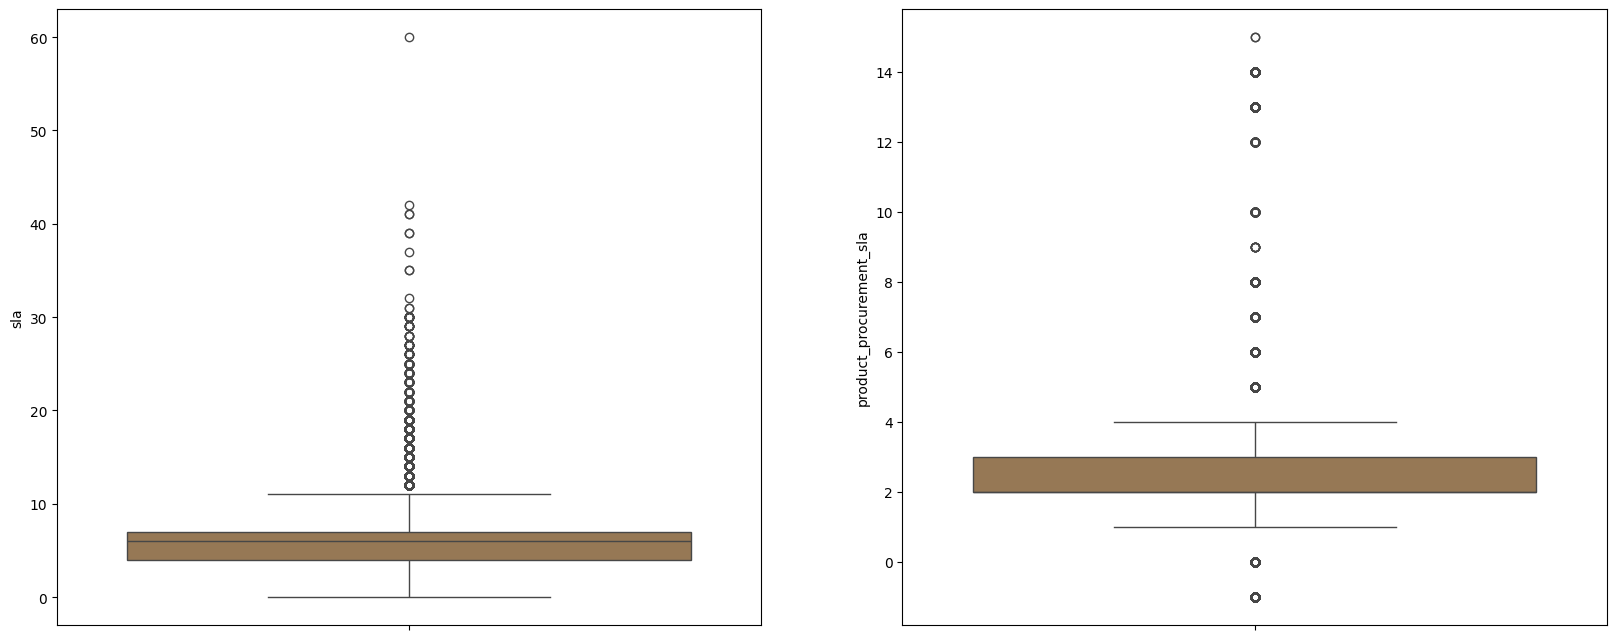

In [45]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.boxplot(y=consumer.sla, palette=("cubehelix"))

plt.subplot(1,2,2)
sns.boxplot(y=consumer.product_procurement_sla, palette=("cubehelix"))

<Axes: xlabel='product_procurement_sla', ylabel='Density'>

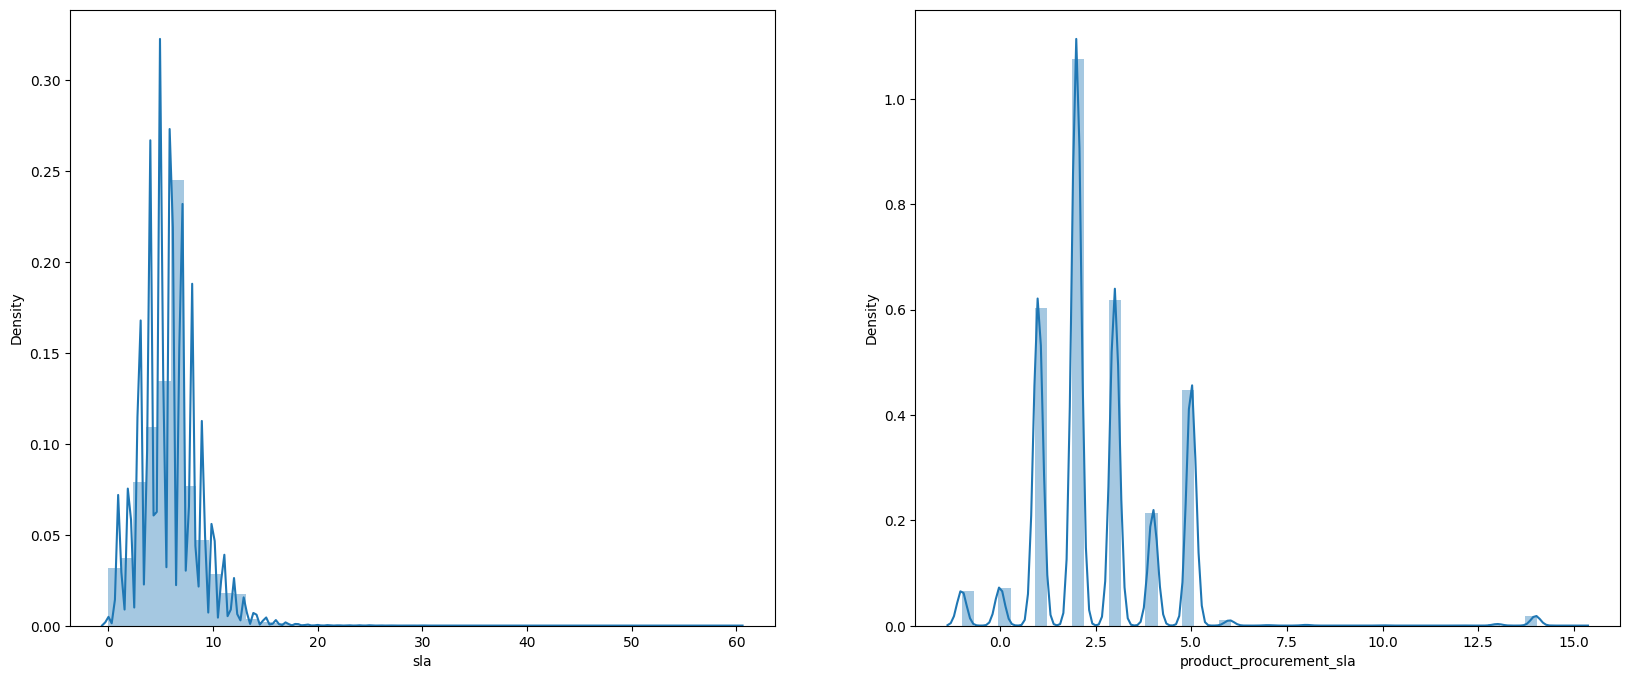

In [46]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(consumer.sla)

plt.subplot(1,2,2)
sns.distplot(consumer.product_procurement_sla)

In [47]:
consumer.sla.describe(percentiles=[0.0,0.25,0.5,0.75,0.9,0.95,0.99,1.0])

count   523804.000
mean         5.885
std          2.697
min          0.000
0%           0.000
25%          4.000
50%          6.000
75%          7.000
90%          9.000
95%         11.000
99%         14.000
100%        60.000
max         60.000
Name: sla, dtype: float64

In [48]:
consumer.product_procurement_sla.describe(percentiles=[0.0,0.25,0.5,0.75,0.9,0.95,0.99,1.0])

count   523804.000
mean         2.560
std          1.715
min         -1.000
0%          -1.000
25%          2.000
50%          2.000
75%          3.000
90%          5.000
95%          5.000
99%          6.000
100%        15.000
max         15.000
Name: product_procurement_sla, dtype: float64

In [49]:
#Converting negative values to the positive
len(consumer.loc[consumer.product_procurement_sla<0])

10901

In [50]:
consumer.product_procurement_sla = abs(consumer.product_procurement_sla)

In [51]:
consumer.sla.std()

2.6969113975718284

In [52]:
#Taking three sigma values for outliers treatment
print(consumer.sla.mean()+(3*(consumer.sla.std())))
print(consumer.sla.mean()-(3*(consumer.sla.std())))

13.975410522029504
-2.206057863401467


In [53]:
consumer.product_procurement_sla.std()

1.6510180203143026

In [54]:
#Taking three sigma values for outliers treatment
print(consumer.product_procurement_sla.mean()+(3*(consumer.product_procurement_sla.std())))
print(consumer.product_procurement_sla.mean()-(3*(consumer.product_procurement_sla.std())))

7.554523312800472
-2.3515848090853426


In [55]:
# Capping the values at three sigma value
len(consumer[consumer.sla > 14])

3382

In [56]:
# Let's cap the SLAs.
consumer.loc[consumer.sla > 14,'sla'] = 14

In [57]:
# Similarly, the min value of product procurement sla is 0 and the max value is 15. However, three sigma value is 7. 
print(len(consumer[consumer.product_procurement_sla > 7]))

3813


In [58]:
# Let's cap the product procuremtn SLAs.
consumer.loc[consumer.product_procurement_sla > 7,'product_procurement_sla'] = 7

In [59]:
consumer.shape

(523804, 15)

In [60]:
consumer.loc[consumer.duplicated()]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, order_payment_type, sla, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla]
Index: []

In [61]:
len(consumer[consumer.duplicated(['order_id','order_item_id'])])

12587

In [62]:
consumer = consumer[~consumer.duplicated(['order_id','order_item_id'])]

In [63]:
consumer.describe()

order_date       Year      Month  \
count                         511217 511217.000 511217.000   
mean   2016-01-20 11:48:24.254430464   2015.576      6.228   
min              2015-07-01 03:35:02   2015.000      1.000   
25%              2015-11-02 19:29:37   2015.000      3.000   
50%              2016-01-23 15:32:09   2016.000      6.000   
75%              2016-04-09 00:16:46   2016.000     10.000   
max              2016-06-30 23:58:39   2016.000     12.000   
std                              NaN      0.494      3.674   

                  order_id          order_item_id        gmv      units  \
count           511217.000             511217.000 511217.000 511217.000   
mean  2835122101205697.000   9390790484550376.000   1290.685      1.024   
min          162957597.000          207200079.000      0.000      1.000   
25%   1595735407225200.000   1598206083624100.000    299.000      1.000   
50%   2609704882795000.000   2613097725117400.000    550.000      1.000   
75%   3615581804522700.000   4388978807078500.000   1500.000      1.000   
max   4641664595370500.000 300037347717704000.000 148050.000     39.000   
std   1290983206428329.500  43696556291619312.000   2438.475      0.239   

             sla  product_mrp  product_procurement_sla  
count 511217.000   511217.000               511217.000  
mean       5.862     2500.782                    2.555  
min        0.000       79.000                    0.000  
25%        4.000      766.000                    2.000  
50%        6.000     1200.000                    2.000  
75%        7.000     2800.000                    3.000  
max       14.000   180000.000                    7.000  
std        2.621     4699.526                    1.414

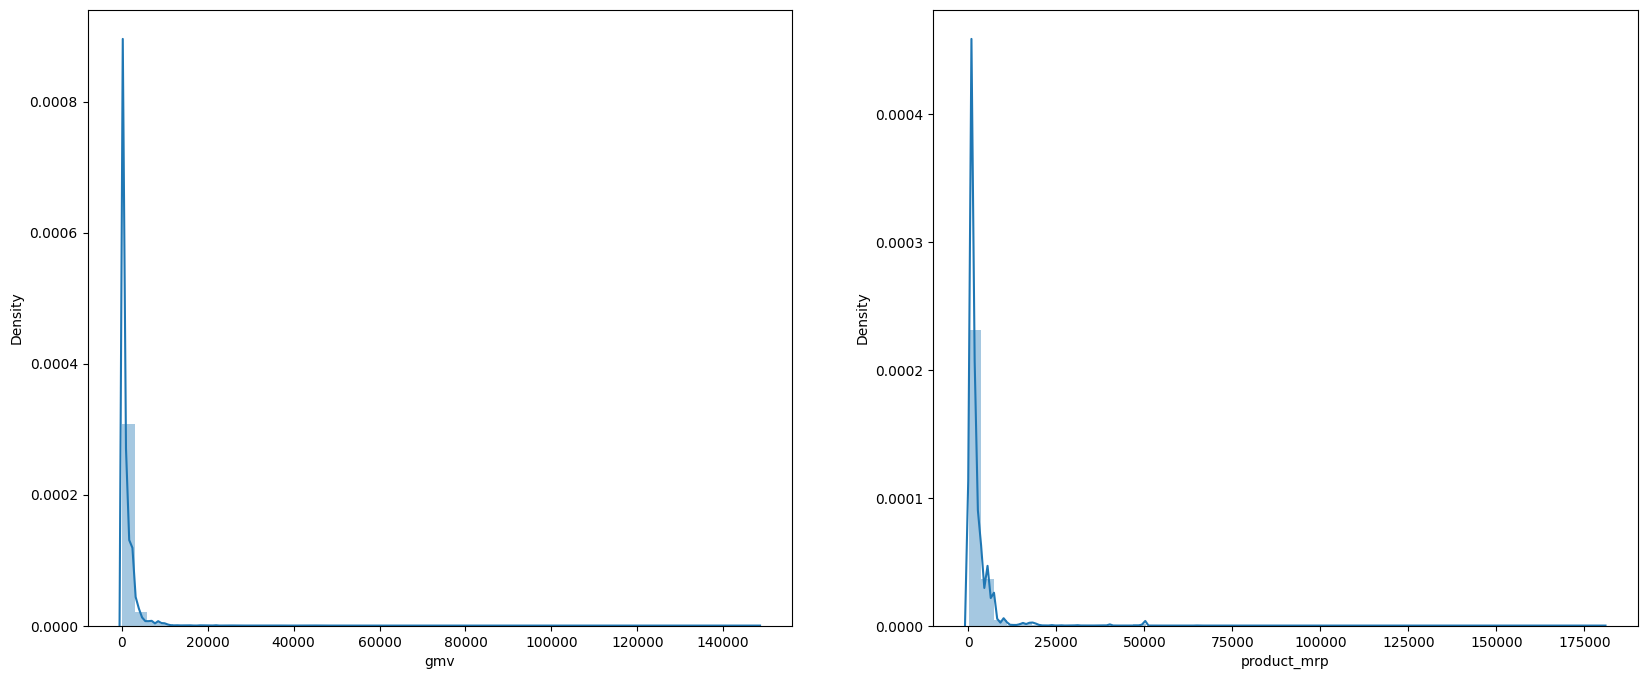

In [64]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(consumer.gmv)

plt.subplot(1,2,2)
sns.distplot(consumer.product_mrp)

plt.show()

Feature Engineering and KPI

In [65]:
#2. gmv (Gross Merchendising Value - The cost price at which the item is sold multiplied by number of units)

# Let's derive listing price, which is nothing but gmv/units

consumer['listing_price'] = round((consumer.gmv/consumer.units),2)

In [66]:
#Let's check if there are any rows with listing price > MRP

len(consumer.loc[consumer.listing_price>consumer.product_mrp])

0

In [67]:
# Let's now calculate the discount %, which is nothing but (mrp-list price)/mrp
consumer['discount'] = round(((consumer.product_mrp - consumer.listing_price)/(consumer.product_mrp)),2)

In [68]:
consumer['discount'].describe()

count   511217.000
mean         0.452
std          0.245
min          0.000
25%          0.260
50%          0.460
75%          0.630
max          1.000
Name: discount, dtype: float64

In [69]:
consumer['Order_Item_Value'] = consumer['product_mrp'] * consumer['units']

In [70]:
# We can create the week number
##consumer['week'] = np.where(consumer.Year == 2015, (consumer.order_date.dt.week - pd.to_datetime('2015-07-01').DatetimeIndex.isocalendar().week + 1), consumer.order_date.dt.week+27)

# Dates like 2016-01-01 will be 53rd week as per ISO standard, hence the week value would be 53+27=80.
# We can make those values as week 27
##consumer.week.values[(consumer.Year == 2016) & (consumer.week == 80)] = 27

In [71]:
consumer['week'] = np.where(
    consumer.Year == 2015, 
    (consumer.order_date.dt.isocalendar().week - pd.to_datetime('2015-07-01').isocalendar()[1] + 1),
    consumer.order_date.dt.isocalendar().week + 27)

In [72]:
consumer.week.values[(consumer.Year == 2016) & (consumer.week == 80)] = 27

In [73]:
consumer['order_payment_type'] = np.where(consumer['order_payment_type'] == "Prepaid",1,0)

In [74]:
# Creating Calendar for the period
calendar = pd.DataFrame(pd.date_range('2015-07-01', '2016-06-30').tolist(), columns=['Date'])

# Mapping week in the calendar using ISO week date system
calendar['week'] = calendar.Date.dt.isocalendar().week

# Adjusting so that Jan 2016 starts from week 54, not week 1.
calendar['week'] = np.where(
    (calendar['week'] <= 26) & (calendar.Date.dt.year == 2016),
    calendar['week'] + 53, 
    calendar['week']
)

In [75]:
calendar.week.value_counts()

week
53    7
65    7
55    7
56    7
57    7
58    7
59    7
60    7
61    7
62    7
63    7
64    7
66    7
28    7
67    7
68    7
69    7
70    7
71    7
72    7
73    7
74    7
75    7
76    7
54    7
52    7
78    7
39    7
29    7
30    7
31    7
32    7
33    7
34    7
35    7
36    7
37    7
38    7
40    7
51    7
41    7
42    7
43    7
44    7
45    7
46    7
47    7
48    7
49    7
50    7
77    7
27    5
79    4
Name: count, dtype: int64

In [76]:
### Special Sales List

special_sales_list = ["2015-07-18","2015-07-19","2015-08-15","2015-08-16","2015-08-17","2015-08-28","2015-08-29",
                      "2015-08-30","2015-10-15","2015-10-16","2015-10-17","2015-11-07","2015-11-08","2015-11-09",
                      "2015-11-10","2015-11-11","2015-11-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26",
                      "2015-12-27","2015-12-28","2015-12-29","2015-12-30","2015-12-31","2016-01-01","2016-01-02",
                      "2016-01-03","2016-01-20","2016-01-21","2016-01-22","2016-02-01","2016-02-02","2016-02-14",
                      "2016-02-15","2016-02-20","2016-02-21","2016-03-07","2016-03-08","2016-03-09","2016-05-25",
                      "2016-05-26","2016-05-27"]

ss_list = pd.DataFrame(special_sales_list,columns = ['Date'])
ss_list['Date'] = pd.to_datetime(ss_list['Date'])
ss_list['Special_sales'] = True

In [77]:
calendar = calendar.merge(ss_list, 'left')
calendar.fillna(False, inplace = True)

In [78]:
calendar['Special_sales'] = calendar['Special_sales'].astype(int)

In [79]:
calendar.head()

Date  week  Special_sales
0 2015-07-01    27              0
1 2015-07-02    27              0
2 2015-07-03    27              0
3 2015-07-04    27              0
4 2015-07-05    27              0

In [80]:
calendar['Payday'] = ((calendar['Date'].dt.day == 1) | (calendar['Date'].dt.day == 15)).astype(int)

Climate Data

In [81]:
### Ontario Climate data of year 2015-2016 
ontario_climate_2015 = pd.DataFrame(pd.read_csv('Data/ONTARIO-2015.csv',encoding="ISO-8859-1",skiprows=24))
ontario_climate_2016 = pd.DataFrame(pd.read_csv('Data/ONTARIO-2016.csv',encoding="ISO-8859-1",skiprows=24))

In [82]:
### Merge Calendar with dataset on week

ontario_climate = pd.concat([ontario_climate_2015, ontario_climate_2016], ignore_index=True)
ontario_climate = ontario_climate.reset_index()

ontario_climate.head()

index   Date/Time  Year  Month  Day Data Quality  Max Temp (Â°C)  \
0      0  2015-01-01  2015      1    1          â            0.000   
1      1  2015-01-02  2015      1    2          â            3.000   
2      2  2015-01-03  2015      1    3          â            2.500   
3      3  2015-01-04  2015      1    4          â            2.500   
4      4  2015-01-05  2015      1    5          â          -10.000   

  Max Temp Flag  Min Temp (Â°C) Min Temp Flag  Mean Temp (Â°C) Mean Temp Flag  \
0           NaN          -8.500           NaN           -4.300            NaN   
1           NaN          -3.000           NaN            0.000            NaN   
2           NaN          -4.000           NaN           -0.800            NaN   
3           NaN           0.000           NaN            1.300            NaN   
4           NaN         -13.500           NaN          -11.800            NaN   

   Heat Deg Days (Â°C) Heat Deg Days Flag  Cool Deg Days (Â°C)  \
0               22.300                NaN                0.000   
1               18.000                NaN                0.000   
2               18.800                NaN                0.000   
3               16.700                NaN                0.000   
4               29.800                NaN                0.000   

  Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm)  \
0                NaN            0.000             NaN            0.000   
1                NaN            0.000             NaN            0.000   
2                NaN           24.000             NaN            0.000   
3                NaN            0.000             NaN            1.000   
4                NaN            0.000             NaN            3.000   

  Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm)  \
0             NaN              0.000               NaN              0.000   
1             NaN              0.000               NaN              0.000   
2             NaN             24.000               NaN              0.000   
3             NaN              1.000               NaN              0.000   
4             NaN              3.000               NaN              1.000   

  Snow on Grnd Flag  Dir of Max Gust (10s deg)  Dir of Max Gust Flag  \
0               NaN                        NaN                   NaN   
1               NaN                        NaN                   NaN   
2               NaN                        NaN                   NaN   
3               NaN                        NaN                   NaN   
4               NaN                        NaN                   NaN   

   Spd of Max Gust (km/h)  Spd of Max Gust Flag  
0                     NaN                   NaN  
1                     NaN                   NaN  
2                     NaN                   NaN  
3                     NaN                   NaN  
4                     NaN                   NaN

In [83]:
round((ontario_climate.isnull().sum()/len(ontario_climate.index))*100,2)

index                         0.000
Date/Time                     0.000
Year                          0.000
Month                         0.000
Day                           0.000
Data Quality                 37.620
Max Temp (Â°C)               39.530
Max Temp Flag                98.080
Min Temp (Â°C)               44.050
Min Temp Flag                93.570
Mean Temp (Â°C)              44.050
Mean Temp Flag               93.570
Heat Deg Days (Â°C)          44.050
Heat Deg Days Flag           93.570
Cool Deg Days (Â°C)          44.050
Cool Deg Days Flag           93.570
Total Rain (mm)              37.620
Total Rain Flag              98.630
Total Snow (cm)              37.620
Total Snow Flag              97.810
Total Precip (mm)            37.620
Total Precip Flag            97.400
Snow on Grnd (cm)            37.620
Snow on Grnd Flag            98.910
Dir of Max Gust (10s deg)   100.000
Dir of Max Gust Flag        100.000
Spd of Max Gust (km/h)      100.000
Spd of Max Gust Flag        

In [84]:
### Dropping columns we do not require in the analysis.
ontario_climate.drop(['index','Data Quality','Max Temp Flag','Min Temp Flag','Mean Temp Flag',
                      'Heat Deg Days Flag','Cool Deg Days Flag','Total Rain Flag','Total Snow Flag',
                      'Total Precip Flag','Snow on Grnd Flag','Dir of Max Gust (10s deg)','Dir of Max Gust Flag',
                      'Spd of Max Gust (km/h)','Spd of Max Gust Flag'], axis = 1, inplace = True)

In [85]:
ontario_climate.columns = ['Date','Year','Month','Day','max_temp_C','min_temp_C','mean_temp_C','heat_deg_days','cool_deg_days','total_rain_mm','total_snow_cm','total_precip_mm','snow_on_grnd_cm']

In [86]:
ontario_climate['Date'] = ontario_climate['Date'].apply(pd.to_datetime)

In [87]:
ontario_climate=ontario_climate[(ontario_climate['Month'] >= 7) & (ontario_climate['Year'] == 2015) 
                               |(ontario_climate['Month'] <= 6) & (ontario_climate['Year'] == 2016)]

In [88]:
### Mapping week in the Climate data
ontario_climate['week'] = ontario_climate.Date.dt.isocalendar().week

### Jan 2016 should be week 54 ,not week 1.
ontario_climate['week'] = np.where((ontario_climate['week'] <= 26) & (ontario_climate['Year'] == 2016), ontario_climate['week']+53, ontario_climate['week'])

ontario_climate = ontario_climate.reset_index()
ontario_climate.drop('index',axis=1,inplace=True)
ontario_climate.head()

Date  Year  Month  Day  max_temp_C  min_temp_C  mean_temp_C  \
0 2015-07-01  2015      7    1      24.500      17.000       20.800   
1 2015-07-02  2015      7    2      24.000      14.000       19.000   
2 2015-07-03  2015      7    3      25.000      10.000       17.500   
3 2015-07-04  2015      7    4      26.000      11.000       18.500   
4 2015-07-05  2015      7    5      28.000      14.000       21.000   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.000          2.800          0.000          0.000   
1          0.000          1.000          0.000          0.000   
2          0.500          0.000          0.000          0.000   
3          0.000          0.500          0.000          0.000   
4          0.000          3.000          0.000          0.000   

   total_precip_mm  snow_on_grnd_cm  week  
0            0.000            0.000    27  
1            0.000            0.000    27  
2            0.000            0.000    27  
3            0.000            0.000    27  
4            0.000            0.000    27

In [89]:
### Checking for any nan values

round((ontario_climate.isnull().sum()/len(ontario_climate.index))*100,2)

Date               0.000
Year               0.000
Month              0.000
Day                0.000
max_temp_C        43.170
min_temp_C        47.810
mean_temp_C       47.810
heat_deg_days     47.810
cool_deg_days     47.810
total_rain_mm     41.260
total_snow_cm     41.260
total_precip_mm   41.260
snow_on_grnd_cm   41.260
week               0.000
dtype: float64

In [90]:
### Replacing Nan with mean value
ontario_climate['max_temp_C'] = ontario_climate['max_temp_C'].fillna(ontario_climate['max_temp_C'].mean())
ontario_climate['min_temp_C'] = ontario_climate['min_temp_C'].fillna(ontario_climate['min_temp_C'].mean())
ontario_climate['mean_temp_C'] = ontario_climate['mean_temp_C'].fillna(ontario_climate['mean_temp_C'].mean())
ontario_climate['heat_deg_days'] = ontario_climate['heat_deg_days'].fillna(ontario_climate['heat_deg_days'].mean())
ontario_climate['cool_deg_days'] = ontario_climate['cool_deg_days'].fillna(ontario_climate['cool_deg_days'].mean())
ontario_climate['total_rain_mm'] = ontario_climate['total_rain_mm'].fillna(ontario_climate['total_rain_mm'].mean())
ontario_climate['total_snow_cm'] = ontario_climate['total_snow_cm'].fillna(ontario_climate['total_snow_cm'].mean())
ontario_climate['total_precip_mm'] = ontario_climate['total_precip_mm'].fillna(ontario_climate['total_precip_mm'].mean())
ontario_climate['snow_on_grnd_cm'] = ontario_climate['snow_on_grnd_cm'].fillna(ontario_climate['snow_on_grnd_cm'].mean())

In [91]:
ontario_climate.head()

Date  Year  Month  Day  max_temp_C  min_temp_C  mean_temp_C  \
0 2015-07-01  2015      7    1      24.500      17.000       20.800   
1 2015-07-02  2015      7    2      24.000      14.000       19.000   
2 2015-07-03  2015      7    3      25.000      10.000       17.500   
3 2015-07-04  2015      7    4      26.000      11.000       18.500   
4 2015-07-05  2015      7    5      28.000      14.000       21.000   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.000          2.800          0.000          0.000   
1          0.000          1.000          0.000          0.000   
2          0.500          0.000          0.000          0.000   
3          0.000          0.500          0.000          0.000   
4          0.000          3.000          0.000          0.000   

   total_precip_mm  snow_on_grnd_cm  week  
0            0.000            0.000    27  
1            0.000            0.000    27  
2            0.000            0.000    27  
3            0.000            0.000    27  
4            0.000            0.000    27

Other KPIs

In [92]:
nps_score = pd.read_excel("Data/Media data and other information.xlsx", sheet_name='Monthly NPS Score', skiprows=1)

In [93]:
### Transforming NPS and Stock_index
nps_score = nps_score.T.reset_index(drop=True)
nps_score.columns = ['NPS','Stock_Index']
nps_score = nps_score.drop(nps_score.index[[0]]).reset_index(drop=True)

In [94]:
### Adding Month and Year
nps_score['Month'] = pd.Series([7,8,9,10,11,12,1,2,3,4,5,6])
nps_score['Year'] = pd.Series([2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016])

In [95]:
nps_score['NPS'] = nps_score['NPS'].astype(float)
nps_score['Stock_Index'] = nps_score['Stock_Index'].astype(float)

In [96]:
nps_score.head()

NPS  Stock_Index  Month  Year
0 54.600     1177.000      7  2015
1 59.987     1206.000      8  2015
2 46.925     1101.000      9  2015
3 44.398     1210.000     10  2015
4 47.000     1233.000     11  2015

Mapping KPI on Calendar

In [97]:
calendar = calendar.merge(ontario_climate, 'left')

In [98]:
calendar = calendar.merge(nps_score, 'left')

In [99]:
# We can create the week number
calendar['week'] = np.where(calendar.Date.dt.year == 2015, (calendar.Date.dt.isocalendar().week - pd.to_datetime('2015-07-01').isocalendar().week + 1), calendar.Date.dt.isocalendar().week+27)

# Dates like 2016-01-01 will be 53rd week as per ISO standard, hence the week value would be 53+27=80.
# We can make those values as week 27
calendar.week.values[(calendar.Date.dt.year == 2016) & (calendar.week == 80)] = 27

In [100]:
calendar.head()

Date  week  Special_sales  Payday  Year  Month  Day  max_temp_C  \
0 2015-07-01     1              0       1  2015      7    1      24.500   
1 2015-07-02     1              0       0  2015      7    2      24.000   
2 2015-07-03     1              0       0  2015      7    3      25.000   
3 2015-07-04     1              0       0  2015      7    4      26.000   
4 2015-07-05     1              0       0  2015      7    5      28.000   

   min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  \
0      17.000       20.800          0.000          2.800          0.000   
1      14.000       19.000          0.000          1.000          0.000   
2      10.000       17.500          0.500          0.000          0.000   
3      11.000       18.500          0.000          0.500          0.000   
4      14.000       21.000          0.000          3.000          0.000   

   total_snow_cm  total_precip_mm  snow_on_grnd_cm    NPS  Stock_Index  
0          0.000            0.000            0.000 54.600     1177.000  
1          0.000            0.000            0.000 54.600     1177.000  
2          0.000            0.000            0.000 54.600     1177.000  
3          0.000            0.000            0.000 54.600     1177.000  
4          0.000            0.000            0.000 54.600     1177.000

In [101]:
calendar = pd.DataFrame(calendar.groupby('week').agg({'NPS':'mean','Stock_Index':'mean',
                                                             'Special_sales':'mean','Payday':'mean',
                                                             'max_temp_C':'mean','min_temp_C':'mean',
                                                             'mean_temp_C':'mean','heat_deg_days':'mean',
                                                             'cool_deg_days':'mean','total_rain_mm':'mean',
                                                             'total_snow_cm':'mean','total_precip_mm':'mean',
                                                             'snow_on_grnd_cm':'mean'}))

In [102]:
calendar.reset_index(inplace = True)

In [103]:
calendar.head()

week    NPS  Stock_Index  Special_sales  Payday  max_temp_C  min_temp_C  \
0     1 54.600     1177.000          0.000   0.200      25.500      13.200   
1     2 54.600     1177.000          0.000   0.000      24.025      14.385   
2     3 54.600     1177.000          0.286   0.143      27.383      16.314   
3     4 54.600     1177.000          0.000   0.000      28.240      14.342   
4     5 56.139     1185.286          0.000   0.143      29.811      16.242   

   mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0       19.360          0.100          1.460          0.000          0.000   
1       19.263          1.059          2.322          4.155          0.029   
2       21.906          0.816          4.722          1.569          0.029   
3       20.540          1.632          4.172          1.141          0.029   
4       23.092          0.816          5.908          4.341          0.029   

   total_precip_mm  snow_on_grnd_cm  
0            0.000            0.000  
1            4.184            0.041  
2            1.598            0.041  
3            1.170            0.041  
4            4.370            0.041

Advertisement Related KPI

In [104]:
### Marketing Investment Data
marketing = pd.read_excel("Data/Media data and other information.xlsx", sheet_name='Media Investment', skipfooter = 4, skiprows=2)

In [105]:
marketing.head()

Unnamed: 0  Year  Month  Total Investment    TV  Digital  Sponsorship  \
0         NaN  2015      7            17.062 0.215    2.533        7.414   
1         NaN  2015      8             5.064 0.006    1.278        1.063   
2         NaN  2015      9            96.254 3.880    1.357       62.788   
3         NaN  2015     10           170.156 6.145   12.622       84.673   
4         NaN  2015     11            51.216 4.221    1.275       14.172   

   Content Marketing  Online marketing   Affiliates    SEM  Radio  Other  
0              0.001             1.327        0.547  5.024    NaN    NaN  
1              0.000             0.129        0.074  2.514    NaN    NaN  
2              0.610            16.380        5.038  6.202    NaN    NaN  
3              3.444            24.372        6.974 31.927    NaN    NaN  
4              0.169            19.562        6.596  5.222    NaN    NaN

In [106]:
marketing.drop('Unnamed: 0', axis = 1, inplace = True)
marketing.replace(np.nan,0,inplace = True)
marketing['Date'] = pd.to_datetime(marketing[['Year', 'Month']].assign(DAY=1))
marketing.set_index('Date', inplace = True)
marketing

Year  Month  Total Investment    TV  Digital  Sponsorship  \
Date                                                                    
2015-07-01  2015      7            17.062 0.215    2.533        7.414   
2015-08-01  2015      8             5.064 0.006    1.278        1.063   
2015-09-01  2015      9            96.254 3.880    1.357       62.788   
2015-10-01  2015     10           170.156 6.145   12.622       84.673   
2015-11-01  2015     11            51.216 4.221    1.275       14.172   
2015-12-01  2015     12           106.745 5.398    3.063       56.705   
2016-01-01  2016      1            74.196 4.380    0.456        4.200   
2016-02-01  2016      2            48.052 2.586    1.913       11.726   
2016-03-01  2016      3           100.025 9.300    2.100       41.590   
2016-04-01  2016      4            56.848 5.205    0.872       24.308   
2016-05-01  2016      5            78.057 1.370    0.770       31.680   
2016-06-01  2016      6            42.834 1.663    1.421       25.049   

            Content Marketing  Online marketing   Affiliates    SEM  Radio  \
Date                                                                         
2015-07-01              0.001             1.327        0.547  5.024  0.000   
2015-08-01              0.000             0.129        0.074  2.514  0.000   
2015-09-01              0.610            16.380        5.038  6.202  0.000   
2015-10-01              3.444            24.372        6.974 31.927  0.000   
2015-11-01              0.169            19.562        6.596  5.222  0.000   
2015-12-01              1.067            22.504        6.827 11.181  0.000   
2016-01-01              0.900            22.900        7.370  4.200  2.700   
2016-02-01              0.597            19.892        6.465  4.874  0.000   
2016-03-01              0.370            18.438        6.218  5.194  0.870   
2016-04-01              0.035            16.515        5.693  4.220  0.000   
2016-05-01              0.790            23.650        6.800  6.910  1.100   
2016-06-01              0.045             7.971        2.768  3.736  0.000   

            Other  
Date               
2015-07-01  0.000  
2015-08-01  0.000  
2015-09-01  0.000  
2015-10-01  0.000  
2015-11-01  0.000  
2015-12-01  0.000  
2016-01-01 27.090  
2016-02-01  0.000  
2016-03-01 15.946  
2016-04-01  0.000  
2016-05-01  4.987  
2016-06-01  0.000

In [107]:
### Renaming the columns

marketing.columns = ['Year','Month','Total_Investment','TV','Digital','Sponsorship','Content_marketing',
                     'Online_marketing','Affiliates','SEM','Radio','Other']

In [108]:
### convert to datetimeindex
marketing.index = pd.to_datetime(marketing.index)

In [109]:
marketing

Year  Month  Total_Investment    TV  Digital  Sponsorship  \
Date                                                                    
2015-07-01  2015      7            17.062 0.215    2.533        7.414   
2015-08-01  2015      8             5.064 0.006    1.278        1.063   
2015-09-01  2015      9            96.254 3.880    1.357       62.788   
2015-10-01  2015     10           170.156 6.145   12.622       84.673   
2015-11-01  2015     11            51.216 4.221    1.275       14.172   
2015-12-01  2015     12           106.745 5.398    3.063       56.705   
2016-01-01  2016      1            74.196 4.380    0.456        4.200   
2016-02-01  2016      2            48.052 2.586    1.913       11.726   
2016-03-01  2016      3           100.025 9.300    2.100       41.590   
2016-04-01  2016      4            56.848 5.205    0.872       24.308   
2016-05-01  2016      5            78.057 1.370    0.770       31.680   
2016-06-01  2016      6            42.834 1.663    1.421       25.049   

            Content_marketing  Online_marketing  Affiliates    SEM  Radio  \
Date                                                                        
2015-07-01              0.001             1.327       0.547  5.024  0.000   
2015-08-01              0.000             0.129       0.074  2.514  0.000   
2015-09-01              0.610            16.380       5.038  6.202  0.000   
2015-10-01              3.444            24.372       6.974 31.927  0.000   
2015-11-01              0.169            19.562       6.596  5.222  0.000   
2015-12-01              1.067            22.504       6.827 11.181  0.000   
2016-01-01              0.900            22.900       7.370  4.200  2.700   
2016-02-01              0.597            19.892       6.465  4.874  0.000   
2016-03-01              0.370            18.438       6.218  5.194  0.870   
2016-04-01              0.035            16.515       5.693  4.220  0.000   
2016-05-01              0.790            23.650       6.800  6.910  1.100   
2016-06-01              0.045             7.971       2.768  3.736  0.000   

            Other  
Date               
2015-07-01  0.000  
2015-08-01  0.000  
2015-09-01  0.000  
2015-10-01  0.000  
2015-11-01  0.000  
2015-12-01  0.000  
2016-01-01 27.090  
2016-02-01  0.000  
2016-03-01 15.946  
2016-04-01  0.000  
2016-05-01  4.987  
2016-06-01  0.000

In [110]:
### add new next month for correct resample
idx = marketing.index[-1] + pd.offsets.MonthBegin(1)
idx

Timestamp('2016-07-01 00:00:00')

In [111]:
last_row_with_new_index = marketing.iloc[[-1]].rename({marketing.index[-1]: idx})

marketing = pd.concat([marketing, last_row_with_new_index])
marketing

Year  Month  Total_Investment    TV  Digital  Sponsorship  \
Date                                                                    
2015-07-01  2015      7            17.062 0.215    2.533        7.414   
2015-08-01  2015      8             5.064 0.006    1.278        1.063   
2015-09-01  2015      9            96.254 3.880    1.357       62.788   
2015-10-01  2015     10           170.156 6.145   12.622       84.673   
2015-11-01  2015     11            51.216 4.221    1.275       14.172   
2015-12-01  2015     12           106.745 5.398    3.063       56.705   
2016-01-01  2016      1            74.196 4.380    0.456        4.200   
2016-02-01  2016      2            48.052 2.586    1.913       11.726   
2016-03-01  2016      3           100.025 9.300    2.100       41.590   
2016-04-01  2016      4            56.848 5.205    0.872       24.308   
2016-05-01  2016      5            78.057 1.370    0.770       31.680   
2016-06-01  2016      6            42.834 1.663    1.421       25.049   
2016-07-01  2016      6            42.834 1.663    1.421       25.049   

            Content_marketing  Online_marketing  Affiliates    SEM  Radio  \
Date                                                                        
2015-07-01              0.001             1.327       0.547  5.024  0.000   
2015-08-01              0.000             0.129       0.074  2.514  0.000   
2015-09-01              0.610            16.380       5.038  6.202  0.000   
2015-10-01              3.444            24.372       6.974 31.927  0.000   
2015-11-01              0.169            19.562       6.596  5.222  0.000   
2015-12-01              1.067            22.504       6.827 11.181  0.000   
2016-01-01              0.900            22.900       7.370  4.200  2.700   
2016-02-01              0.597            19.892       6.465  4.874  0.000   
2016-03-01              0.370            18.438       6.218  5.194  0.870   
2016-04-01              0.035            16.515       5.693  4.220  0.000   
2016-05-01              0.790            23.650       6.800  6.910  1.100   
2016-06-01              0.045             7.971       2.768  3.736  0.000   
2016-07-01              0.045             7.971       2.768  3.736  0.000   

            Other  
Date               
2015-07-01  0.000  
2015-08-01  0.000  
2015-09-01  0.000  
2015-10-01  0.000  
2015-11-01  0.000  
2015-12-01  0.000  
2016-01-01 27.090  
2016-02-01  0.000  
2016-03-01 15.946  
2016-04-01  0.000  
2016-05-01  4.987  
2016-06-01  0.000  
2016-07-01  0.000

In [112]:
#Resampling the data on weekly frequency
marketing = marketing.resample('W').ffill().iloc[:-1]
marketing

Year  Month  Total_Investment    TV  Digital  Sponsorship  \
Date                                                                    
2015-07-05  2015      7            17.062 0.215    2.533        7.414   
2015-07-12  2015      7            17.062 0.215    2.533        7.414   
2015-07-19  2015      7            17.062 0.215    2.533        7.414   
2015-07-26  2015      7            17.062 0.215    2.533        7.414   
2015-08-02  2015      8             5.064 0.006    1.278        1.063   
2015-08-09  2015      8             5.064 0.006    1.278        1.063   
2015-08-16  2015      8             5.064 0.006    1.278        1.063   
2015-08-23  2015      8             5.064 0.006    1.278        1.063   
2015-08-30  2015      8             5.064 0.006    1.278        1.063   
2015-09-06  2015      9            96.254 3.880    1.357       62.788   
2015-09-13  2015      9            96.254 3.880    1.357       62.788   
2015-09-20  2015      9            96.254 3.880    1.357       62.788   
2015-09-27  2015      9            96.254 3.880    1.357       62.788   
2015-10-04  2015     10           170.156 6.145   12.622       84.673   
2015-10-11  2015     10           170.156 6.145   12.622       84.673   
2015-10-18  2015     10           170.156 6.145   12.622       84.673   
2015-10-25  2015     10           170.156 6.145   12.622       84.673   
2015-11-01  2015     11            51.216 4.221    1.275       14.172   
2015-11-08  2015     11            51.216 4.221    1.275       14.172   
2015-11-15  2015     11            51.216 4.221    1.275       14.172   
2015-11-22  2015     11            51.216 4.221    1.275       14.172   
2015-11-29  2015     11            51.216 4.221    1.275       14.172   
2015-12-06  2015     12           106.745 5.398    3.063       56.705   
2015-12-13  2015     12           106.745 5.398    3.063       56.705   
2015-12-20  2015     12           106.745 5.398    3.063       56.705   
2015-12-27  2015     12           106.745 5.398    3.063       56.705   
2016-01-03  2016      1            74.196 4.380    0.456        4.200   
2016-01-10  2016      1            74.196 4.380    0.456        4.200   
2016-01-17  2016      1            74.196 4.380    0.456        4.200   
2016-01-24  2016      1            74.196 4.380    0.456        4.200   
2016-01-31  2016      1            74.196 4.380    0.456        4.200   
2016-02-07  2016      2            48.052 2.586    1.913       11.726   
2016-02-14  2016      2            48.052 2.586    1.913       11.726   
2016-02-21  2016      2            48.052 2.586    1.913       11.726   
2016-02-28  2016      2            48.052 2.586    1.913       11.726   
2016-03-06  2016      3           100.025 9.300    2.100       41.590   
2016-03-13  2016      3           100.025 9.300    2.100       41.590   
2016-03-20  2016      3           100.025 9.300    2.100       41.590   
2016-03-27  2016      3           100.025 9.300    2.100       41.590   
2016-04-03  2016      4            56.848 5.205    0.872       24.308   
2016-04-10  2016      4            56.848 5.205    0.872       24.308   
2016-04-17  2016      4            56.848 5.205    0.872       24.308   
2016-04-24  2016      4            56.848 5.205    0.872       24.308   
2016-05-01  2016      5            78.057 1.370    0.770       31.680   
2016-05-08  2016      5            78.057 1.370    0.770       31.680   
2016-05-15  2016      5            78.057 1.370    0.770       31.680   
2016-05-22  2016      5            78.057 1.370    0.770       31.680   
2016-05-29  2016      5            78.057 1.370    0.770       31.680   
2016-06-05  2016      6            42.834 1.663    1.421       25.049   
2016-06-12  2016      6            42.834 1.663    1.421       25.049   
2016-06-19  2016      6            42.834 1.663    1.421       25.049   
2016-06-26  2016      6            42.834 1.663    1.421       25.049   

            Content_marketing  Online_marketing  Affiliates    SEM  R

In [113]:
### divide by size of months
marketing['Total_Investment'] /= marketing.resample('MS')['Total_Investment'].transform('size')
marketing['TV'] /= marketing.resample('MS')['TV'].transform('size')
marketing['Digital'] /= marketing.resample('MS')['Digital'].transform('size')
marketing['Sponsorship'] /= marketing.resample('MS')['Sponsorship'].transform('size')
marketing['Content_marketing'] /= marketing.resample('MS')['Content_marketing'].transform('size')
marketing['Online_marketing'] /= marketing.resample('MS')['Online_marketing'].transform('size')
marketing['Affiliates'] /= marketing.resample('MS')['Affiliates'].transform('size')
marketing['SEM'] /= marketing.resample('MS')['SEM'].transform('size')
marketing['Radio'] /= marketing.resample('MS')['Radio'].transform('size')
marketing['Other'] /= marketing.resample('MS')['Other'].transform('size')

In [114]:
marketing.head()

Year  Month  Total_Investment    TV  Digital  Sponsorship  \
Date                                                                    
2015-07-05  2015      7             4.265 0.054    0.633        1.854   
2015-07-12  2015      7             4.265 0.054    0.633        1.854   
2015-07-19  2015      7             4.265 0.054    0.633        1.854   
2015-07-26  2015      7             4.265 0.054    0.633        1.854   
2015-08-02  2015      8             1.013 0.001    0.256        0.213   

            Content_marketing  Online_marketing  Affiliates   SEM  Radio  \
Date                                                                       
2015-07-05              0.000             0.332       0.137 1.256  0.000   
2015-07-12              0.000             0.332       0.137 1.256  0.000   
2015-07-19              0.000             0.332       0.137 1.256  0.000   
2015-07-26              0.000             0.332       0.137 1.256  0.000   
2015-08-02              0.000             0.026       0.015 0.503  0.000   

            Other  
Date               
2015-07-05  0.000  
2015-07-12  0.000  
2015-07-19  0.000  
2015-07-26  0.000  
2015-08-02  0.000

In [115]:
marketing.reset_index(inplace = True)

###  Mapping week in the marketing

marketing['Date'] = pd.to_datetime(marketing['Date'])
# We can create the week number
marketing['week'] = np.where(marketing.Date.dt.year == 2015, (marketing.Date.dt.isocalendar().week - pd.to_datetime('2015-07-01').isocalendar().week + 1), marketing.Date.dt.isocalendar().week+27)

marketing.week.values[(marketing.Date.dt.year == 2016) & (marketing.week == 80)] = 27
marketing.sort_values('week', inplace = True)

In [116]:
marketing.head()

Date  Year  Month  Total_Investment    TV  Digital  Sponsorship  \
0 2015-07-05  2015      7             4.265 0.054    0.633        1.854   
1 2015-07-12  2015      7             4.265 0.054    0.633        1.854   
2 2015-07-19  2015      7             4.265 0.054    0.633        1.854   
3 2015-07-26  2015      7             4.265 0.054    0.633        1.854   
4 2015-08-02  2015      8             1.013 0.001    0.256        0.213   

   Content_marketing  Online_marketing  Affiliates   SEM  Radio  Other  week  
0              0.000             0.332       0.137 1.256  0.000  0.000     1  
1              0.000             0.332       0.137 1.256  0.000  0.000     2  
2              0.000             0.332       0.137 1.256  0.000  0.000     3  
3              0.000             0.332       0.137 1.256  0.000  0.000     4  
4              0.000             0.026       0.015 0.503  0.000  0.000     5

Adstock

In [117]:
def adstocked_advertising(adstock_rate=0.5, advertising = marketing):
    
    adstocked_advertising = []
    for i in range(len(advertising)):
        if i == 0: 
            adstocked_advertising.append(advertising.iloc[i])
        else:
            adstocked_advertising.append(advertising.iloc[i] + adstock_rate * advertising.iloc[i-1])            
    return adstocked_advertising

In [118]:
adstock = pd.DataFrame()

In [119]:
adstock['TV_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['TV'])

adstock['Digital_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Digital'])

adstock['Sponsorship_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Sponsorship'])

adstock['Content_marketing_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Content_marketing'])

adstock['Online_marketing_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Online_marketing'])

adstock['Affiliates_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Affiliates'])

adstock['SEM_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['SEM'])

adstock['Radio_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Radio'])

adstock['Other_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Other'])

In [120]:
adstock.head()

TV_ads  Digital_ads  Sponsorship_ads  Content_marketing_ads  \
0   0.054        0.633            1.854                  0.000   
1   0.081        0.950            2.780                  0.000   
2   0.081        0.950            2.780                  0.000   
3   0.081        0.950            2.780                  0.000   
4   0.028        0.572            1.139                  0.000   

   Online_marketing_ads  Affiliates_ads  SEM_ads  Radio_ads  Other_ads  
0                 0.332           0.137    1.256      0.000      0.000  
1                 0.498           0.205    1.884      0.000      0.000  
2                 0.498           0.205    1.884      0.000      0.000  
3                 0.498           0.205    1.884      0.000      0.000  
4                 0.192           0.083    1.131      0.000      0.000

Mapping marketing and adstock

In [121]:
marketing = pd.concat([marketing,adstock] ,axis=1)

In [122]:
marketing.head()

Date  Year  Month  Total_Investment    TV  Digital  Sponsorship  \
0 2015-07-05  2015      7             4.265 0.054    0.633        1.854   
1 2015-07-12  2015      7             4.265 0.054    0.633        1.854   
2 2015-07-19  2015      7             4.265 0.054    0.633        1.854   
3 2015-07-26  2015      7             4.265 0.054    0.633        1.854   
4 2015-08-02  2015      8             1.013 0.001    0.256        0.213   

   Content_marketing  Online_marketing  Affiliates   SEM  Radio  Other  week  \
0              0.000             0.332       0.137 1.256  0.000  0.000     1   
1              0.000             0.332       0.137 1.256  0.000  0.000     2   
2              0.000             0.332       0.137 1.256  0.000  0.000     3   
3              0.000             0.332       0.137 1.256  0.000  0.000     4   
4              0.000             0.026       0.015 0.503  0.000  0.000     5   

   TV_ads  Digital_ads  Sponsorship_ads  Content_marketing_ads  \
0   0.054        0.633            1.854                  0.000   
1   0.081        0.950            2.780                  0.000   
2   0.081        0.950            2.780                  0.000   
3   0.081        0.950            2.780                  0.000   
4   0.028        0.572            1.139                  0.000   

   Online_marketing_ads  Affiliates_ads  SEM_ads  Radio_ads  Other_ads  
0                 0.332           0.137    1.256      0.000      0.000  
1                 0.498           0.205    1.884      0.000      0.000  
2                 0.498           0.205    1.884      0.000      0.000  
3                 0.498           0.205    1.884      0.000      0.000  
4                 0.192           0.083    1.131      0.000      0.000

Product premium-ness

In [123]:
# The premium-ness of the product depends on the MRP. Higher the MRP, more premium is the product.
# Let's check the percentiles of MRP in the dataset.

consumer.product_mrp.describe(percentiles=[0.25,0.5,0.75,0.8,0.9,0.95,0.99])

count   511217.000
mean      2500.782
std       4699.526
min         79.000
25%        766.000
50%       1200.000
75%       2800.000
80%       3150.000
90%       5399.000
95%       6990.000
99%      18999.000
max     180000.000
Name: product_mrp, dtype: float64

In [124]:
# Let's assume that products with MRP greater than 90 percentile to be premium products.
# Create a dataframe with mrp, number of units sold and gmv against each product vertical to analyse better.
prod_cat = pd.DataFrame(pd.pivot_table(consumer, values = ['units','product_mrp', 'gmv'], index = ['product_analytic_vertical'], 
               aggfunc={'units':np.sum, 'product_mrp':np.mean, 'gmv':np.sum}).to_records())

In [125]:
# Marking products with MRP greater than 90th percentile with 1 and rest with 0
prod_cat['premium_product'] = np.where((prod_cat.product_mrp>consumer.product_mrp.quantile(0.9)),1,0)

In [126]:
prod_cat.loc[prod_cat.premium_product==1]

product_analytic_vertical         gmv  product_mrp  units  premium_product
10            CameraLEDLight   20215.000     6738.333      3                1
16              DJController 2335536.000    17692.871    191                1
39             KaraokePlayer   23500.000    12000.000      2                1
41          MotionController 4134009.000     5841.381   1057                1
43                  SlingBox   20495.000     7999.000      5                1
45                SoundMixer  638073.000    12271.377     69                1
48             Teleconverter   15299.000    20490.000      1                1

Clearly, Teleconverter, SoundMixer, SlingBox, MotionController, KaraokePlayer, DJController are premium products. All other products are mass products.
Let's visualise how the premium products contribute towards the GMV.

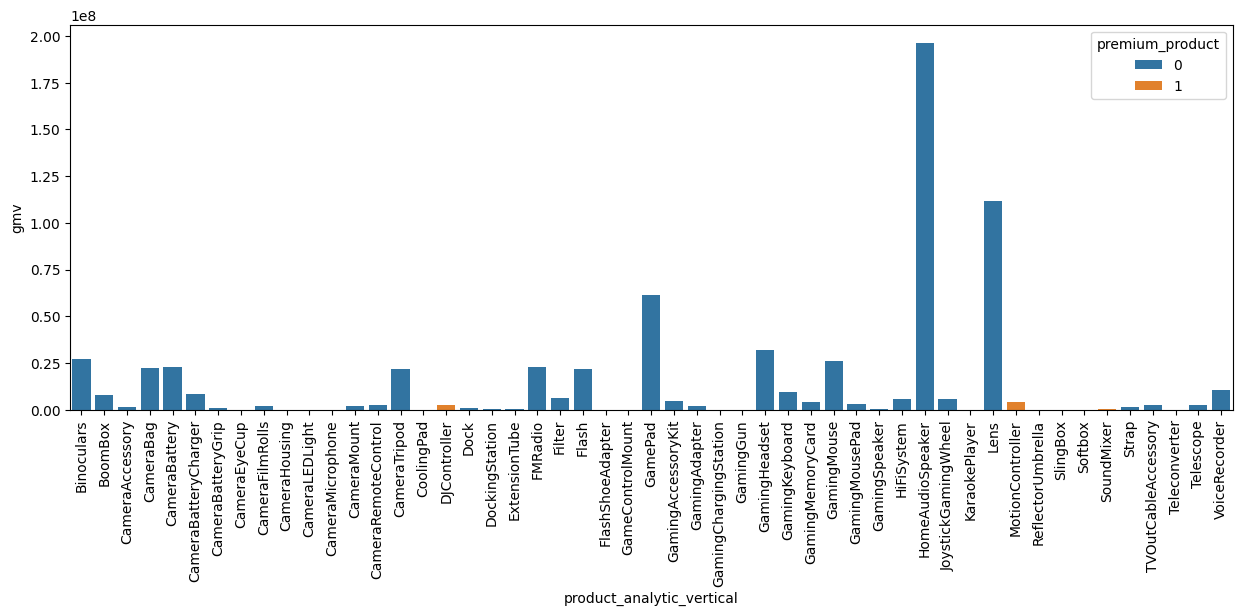

In [127]:
plt.figure(figsize=(15,5))
sns.barplot(x = prod_cat.product_analytic_vertical, y=prod_cat.gmv, hue=prod_cat.premium_product)
plt.xticks(rotation=90)
plt.show()

We can clearly see that, maximum revenue is generated through mass producs like HomeAudioSpeaker, Lens, GamingPad, etc and not premium products that contibute quite less towards revenue.
The company hence should focus more on mass products than premium products.

In [128]:
consumer = consumer.merge(prod_cat[['product_analytic_vertical', 'premium_product']] , left_on='product_analytic_vertical', 
            right_on='product_analytic_vertical',
                   how = 'inner')

In [129]:
sales = consumer.copy()

In [130]:
consumer.drop(['product_analytic_vertical'],axis=1,inplace=True)

In [131]:
consumer.head()

fsn_id          order_date  Year  Month             order_id  \
0  ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015     10 3419300926147000.000   
1  ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015     10 1420830839915200.000   
2  ACCCX3S5AHMF55FV 2015-10-20 15:45:56  2015     10 2421912925714800.000   
3  ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015     10 4416592101738400.000   
4  ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015     10 4419525153426400.000   

         order_item_id      gmv  units  order_payment_type  sla  \
0 3419300926147000.000 6400.000      1                   0    5   
1 1420830839915200.000 6900.000      1                   0    7   
2 2421912925714800.000 1990.000      1                   0   10   
3 4416592101738400.000 1690.000      1                   1    4   
4 4419525153426400.000 1618.000      1                   1    6   

  product_analytic_category product_analytic_sub_category  product_mrp  \
0           CameraAccessory               CameraAccessory         7190   
1           CameraAccessory               CameraAccessory         7190   
2           CameraAccessory               CameraAccessory         2099   
3           CameraAccessory               CameraAccessory         2099   
4           CameraAccessory               CameraAccessory         2099   

   product_procurement_sla  listing_price  discount  Order_Item_Value  week  \
0                        0       6400.000     0.110              7190    16   
1                        0       6900.000     0.040              7190    17   
2                        3       1990.000     0.050              2099    17   
3                        3       1690.000     0.190              2099    16   
4                        3       1618.000     0.230              2099    16   

   premium_product  
0                0  
1                0  
2                0  
3                0  
4                0

4. Aggregation

1. Camera Sub Category

In [132]:
camera_df = consumer[consumer['product_analytic_sub_category'] == 'CameraAccessory']

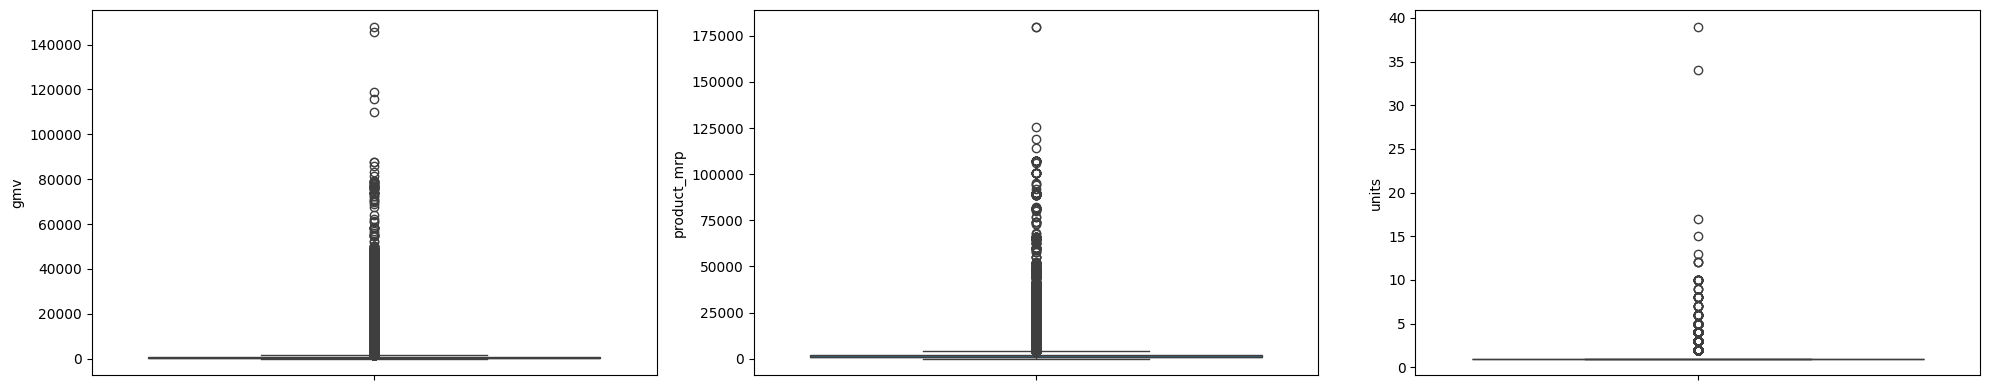

In [133]:
###  Removing outliers is important as
###  1. There may be some garbage value.
###  2. Bulk orders can skew the analysis
### Outlier Analysis
fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(camera_df['gmv'], ax = axs[0])
plt2 = sns.boxplot(camera_df['units'], ax = axs[2])
plt4 = sns.boxplot(camera_df['product_mrp'], ax = axs[1])
plt.tight_layout()

In [134]:
### Treating outliers
### Outlier treatment for gmv & product_mrp
Q1 = camera_df.gmv.quantile(0.25)
Q3 = camera_df.gmv.quantile(0.75)
IQR = Q3 - Q1
camera_df = camera_df[(camera_df.gmv >= Q1 - 1.5*IQR) & (camera_df.gmv <= Q3 + 1.5*IQR)]
Q1 = camera_df.product_mrp.quantile(0.25)
Q3 = camera_df.product_mrp.quantile(0.75)
IQR = Q3 - Q1
camera_df = camera_df[(camera_df.product_mrp >= Q1 - 1.5*IQR) & (camera_df.product_mrp <= Q3 + 1.5*IQR)]

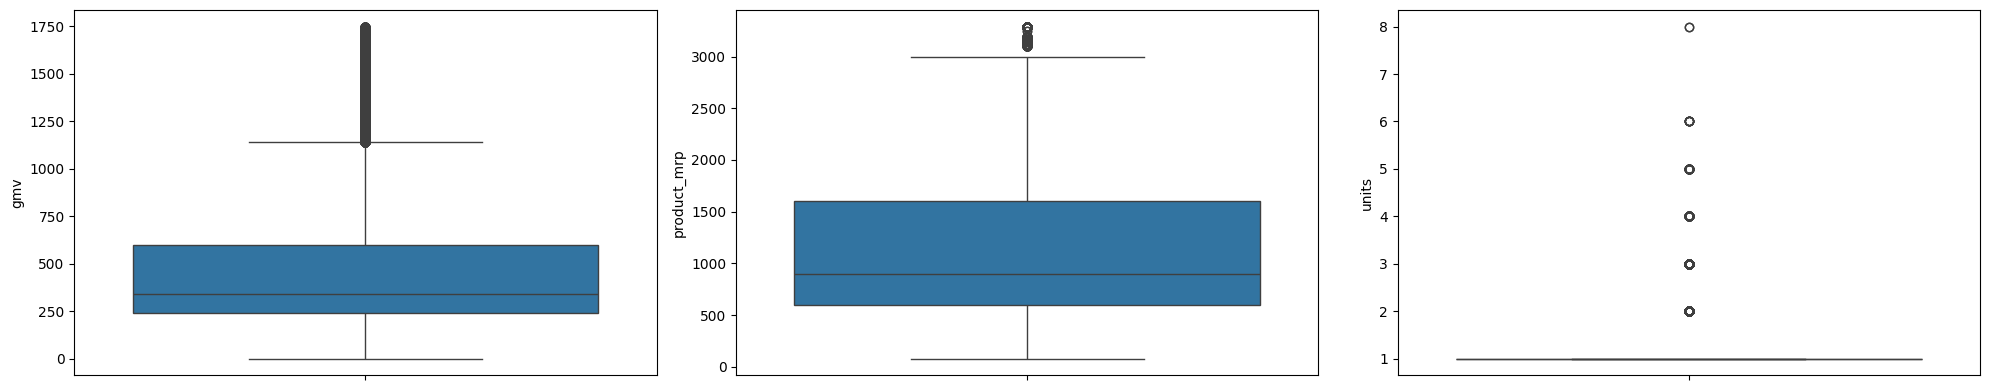

In [135]:
### Outlier Analysis
fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(camera_df['gmv'], ax = axs[0])
plt2 = sns.boxplot(camera_df['units'], ax = axs[2])
plt4 = sns.boxplot(camera_df['product_mrp'], ax = axs[1])
plt.tight_layout()

In [136]:
camera_df.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_mrp', 'product_procurement_sla', 'listing_price', 'discount',
       'Order_Item_Value', 'week', 'premium_product'],
      dtype='object')

In [137]:
camera_df.head()

fsn_id          order_date  Year  Month             order_id  \
3    ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015     10 4416592101738400.000   
4    ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015     10 4419525153426400.000   
569  ACCCX3SH73WUYMEF 2015-10-13 06:39:17  2015     10 3415533934430600.000   
570  ACCCX3SH73WUYMEF 2015-10-17 10:35:29  2015     10 3419135095214600.000   
571  ACCCX3SH73WUYMEF 2015-10-05 01:03:23  2015     10 4408419760104300.000   

           order_item_id      gmv  units  order_payment_type  sla  \
3   4416592101738400.000 1690.000      1                   1    4   
4   4419525153426400.000 1618.000      1                   1    6   
569 3415533934430600.000 1100.000      1                   1    5   
570 3419135095214600.000 1425.000      1                   0    3   
571 4408419760104300.000 1425.000      1                   0    5   

    product_analytic_category product_analytic_sub_category  product_mrp  \
3             CameraAccessory               CameraAccessory         2099   
4             CameraAccessory               CameraAccessory         2099   
569           CameraAccessory               CameraAccessory         1999   
570           CameraAccessory               CameraAccessory         1999   
571           CameraAccessory               CameraAccessory         1999   

     product_procurement_sla  listing_price  discount  Order_Item_Value  week  \
3                          3       1690.000     0.190              2099    16   
4                          3       1618.000     0.230              2099    16   
569                        3       1100.000     0.450              1999    16   
570                        3       1425.000     0.290              1999    16   
571                        3       1425.000     0.290              1999    15   

     premium_product  
3                  0  
4                  0  
569                0  
570                0  
571                0

In [138]:
### Aggregating dataset on weekly level

ca_week = pd.DataFrame(camera_df.groupby('week').agg({'gmv':'sum','listing_price':'mean',
                                                             'product_mrp':'mean','discount':'mean',
                                                             'sla':'mean','product_procurement_sla':'mean',
                                                             'fsn_id':pd.Series.nunique,'order_item_id':pd.Series.nunique,
                                                             'order_id': pd.Series.nunique,
                                                             'order_payment_type':'sum',
                                                            'premium_product':'sum'}))

ca_week.reset_index( inplace = True)

In [139]:
ca_week.head()

week         gmv  listing_price  product_mrp  discount   sla  \
0     1   11151.000        428.885     1121.038     0.491 2.423   
1     2 1228580.000        501.230     1013.379     0.448 7.253   
2     3 1344416.000        512.763     1096.768     0.458 6.567   
3     4 1346986.000        511.973     1086.319     0.445 6.611   
4     5  913445.000        522.839     1085.847     0.443 6.533   

   product_procurement_sla  fsn_id  order_item_id  order_id  \
0                    2.731      20             26        26   
1                    2.578     540           2390      2345   
2                    2.577     538           2570      2539   
3                    2.613     529           2571      2534   
4                    2.614     442           1703      1675   

   order_payment_type  premium_product  
0                  26                0  
1                 753                0  
2                 823                0  
3                 781                0  
4                 470                0

In [140]:
### Sum of GMV / No of unique Orders

ca_week['AOV'] = ca_week['gmv']/ca_week['order_id']

In [141]:
ca_week['online_order_perc'] = ca_week['order_payment_type']*100/ca_week['order_item_id']

In [142]:
ca_week.week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53], dtype=uint32)

In [143]:
calendar.week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53], dtype=uint32)

In [144]:
ca_week['week'] = ca_week['week'].astype(int)
calendar['week'] = calendar['week'].astype(int)

In [145]:
ca_week = ca_week.merge(marketing, how = 'left', on = 'week')

In [146]:
ca_week = ca_week.merge(calendar, how = 'left', on = 'week')

In [147]:
ca_week.head()

week         gmv  listing_price  product_mrp  discount   sla  \
0     1   11151.000        428.885     1121.038     0.491 2.423   
1     2 1228580.000        501.230     1013.379     0.448 7.253   
2     3 1344416.000        512.763     1096.768     0.458 6.567   
3     4 1346986.000        511.973     1086.319     0.445 6.611   
4     5  913445.000        522.839     1085.847     0.443 6.533   

   product_procurement_sla  fsn_id  order_item_id  order_id  \
0                    2.731      20             26        26   
1                    2.578     540           2390      2345   
2                    2.577     538           2570      2539   
3                    2.613     529           2571      2534   
4                    2.614     442           1703      1675   

   order_payment_type  premium_product     AOV  online_order_perc       Date  \
0                  26                0 428.885            100.000 2015-07-05   
1                 753                0 523.915             31.506 2015-07-12   
2                 823                0 529.506             32.023 2015-07-19   
3                 781                0 531.565             30.377 2015-07-26   
4                 470                0 545.340             27.598 2015-08-02   

      Year  Month  Total_Investment    TV  Digital  Sponsorship  \
0 2015.000  7.000             4.265 0.054    0.633        1.854   
1 2015.000  7.000             4.265 0.054    0.633        1.854   
2 2015.000  7.000             4.265 0.054    0.633        1.854   
3 2015.000  7.000             4.265 0.054    0.633        1.854   
4 2015.000  8.000             1.013 0.001    0.256        0.213   

   Content_marketing  Online_marketing  Affiliates   SEM  Radio  Other  \
0              0.000             0.332       0.137 1.256  0.000  0.000   
1              0.000             0.332       0.137 1.256  0.000  0.000   
2              0.000             0.332       0.137 1.256  0.000  0.000   
3              0.000             0.332       0.137 1.256  0.000  0.000   
4              0.000             0.026       0.015 0.503  0.000  0.000   

   TV_ads  Digital_ads  Sponsorship_ads  Content_marketing_ads  \
0   0.054        0.633            1.854                  0.000   
1   0.081        0.950            2.780                  0.000   
2   0.081        0.950            2.780                  0.000   
3   0.081        0.950            2.780                  0.000   
4   0.028        0.572            1.139                  0.000   

   Online_marketing_ads  Affiliates_ads  SEM_ads  Radio_ads  Other_ads    NPS  \
0                 0.332           0.137    1.256      0.000      0.000 54.600   
1                 0.498           0.205    1.884      0.000      0.000 54.600   
2                 0.498           0.205    1.884      0.000      0.000 54.600   
3                 0.498           0.205    1.884      0.000      0.000 54.600   
4                 0.192           0.083    1.131      0.000      0.000 56.139   

   Stock_Index  Special_sales  Payday  max_temp_C  min_temp_C  mean_temp_C  \
0     1177.000          0.000   0.200      25.500      13.200       19.360   
1     1177.000          0.000   0.000      24.025      14.385       19.263   
2     1177.000          0.286   0.143      27.383      16.314       21.906   
3     1177.000          0.000   0.000      28.240      14.342       20.540   
4     1185.286          0.000   0.143      29.811      16.242       23.092   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   total_precip_mm  snow_on_grnd_cm  
0            0.000            0.000  
1            4.184            0.041  
2            1.598            0.04

Exploratory Data Analysis¶

In [148]:
ca_week_viz = ca_week.round(2)

Univariate Analysis

Target Variable

<Axes: xlabel='gmv', ylabel='Density'>

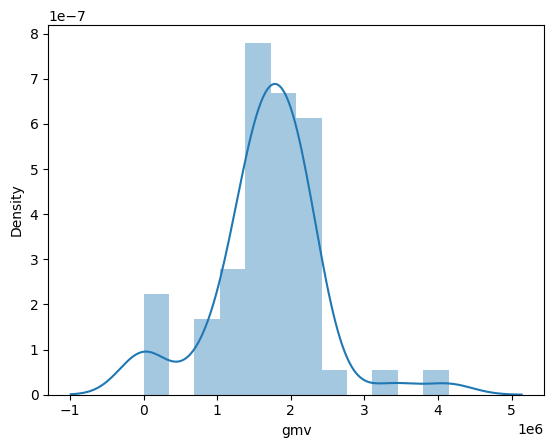

In [149]:
sns.distplot(ca_week_viz['gmv'],kde=True)

<Axes: xlabel='week', ylabel='gmv'>

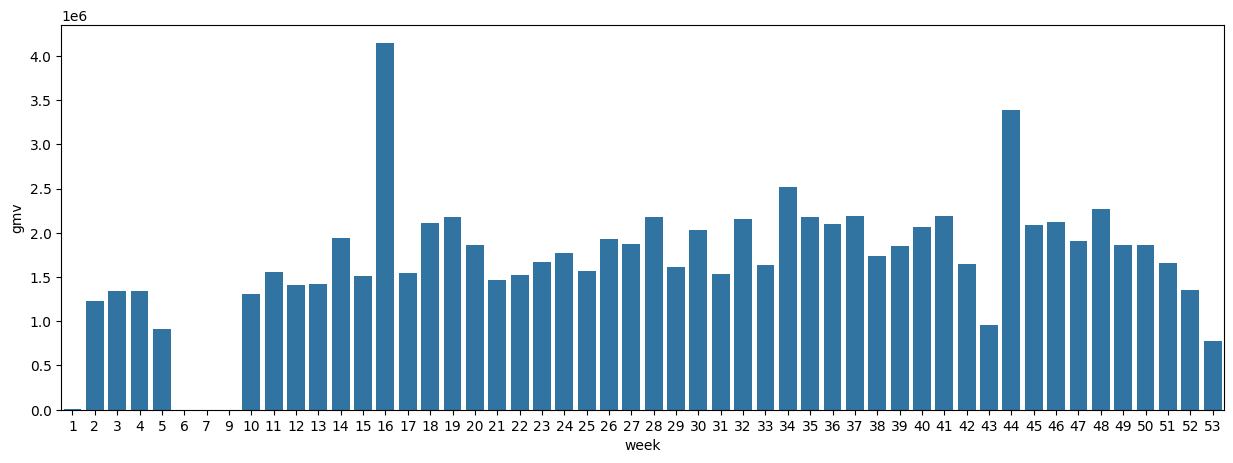

In [150]:
plt.figure(figsize=(15, 5))
sns.barplot(x=ca_week_viz['week'],y=ca_week_viz['gmv'])

Marketing KPIs

In [151]:
ca_week_viz.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_item_id', 'order_id',
       'order_payment_type', 'premium_product', 'AOV', 'online_order_perc',
       'Date', 'Year', 'Month', 'Total_Investment', 'TV', 'Digital',
       'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates',
       'SEM', 'Radio', 'Other', 'TV_ads', 'Digital_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'Affiliates_ads',
       'SEM_ads', 'Radio_ads', 'Other_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'max_temp_C', 'min_temp_C', 'mean_temp_C',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'total_precip_mm', 'snow_on_grnd_cm'],
      dtype='object')

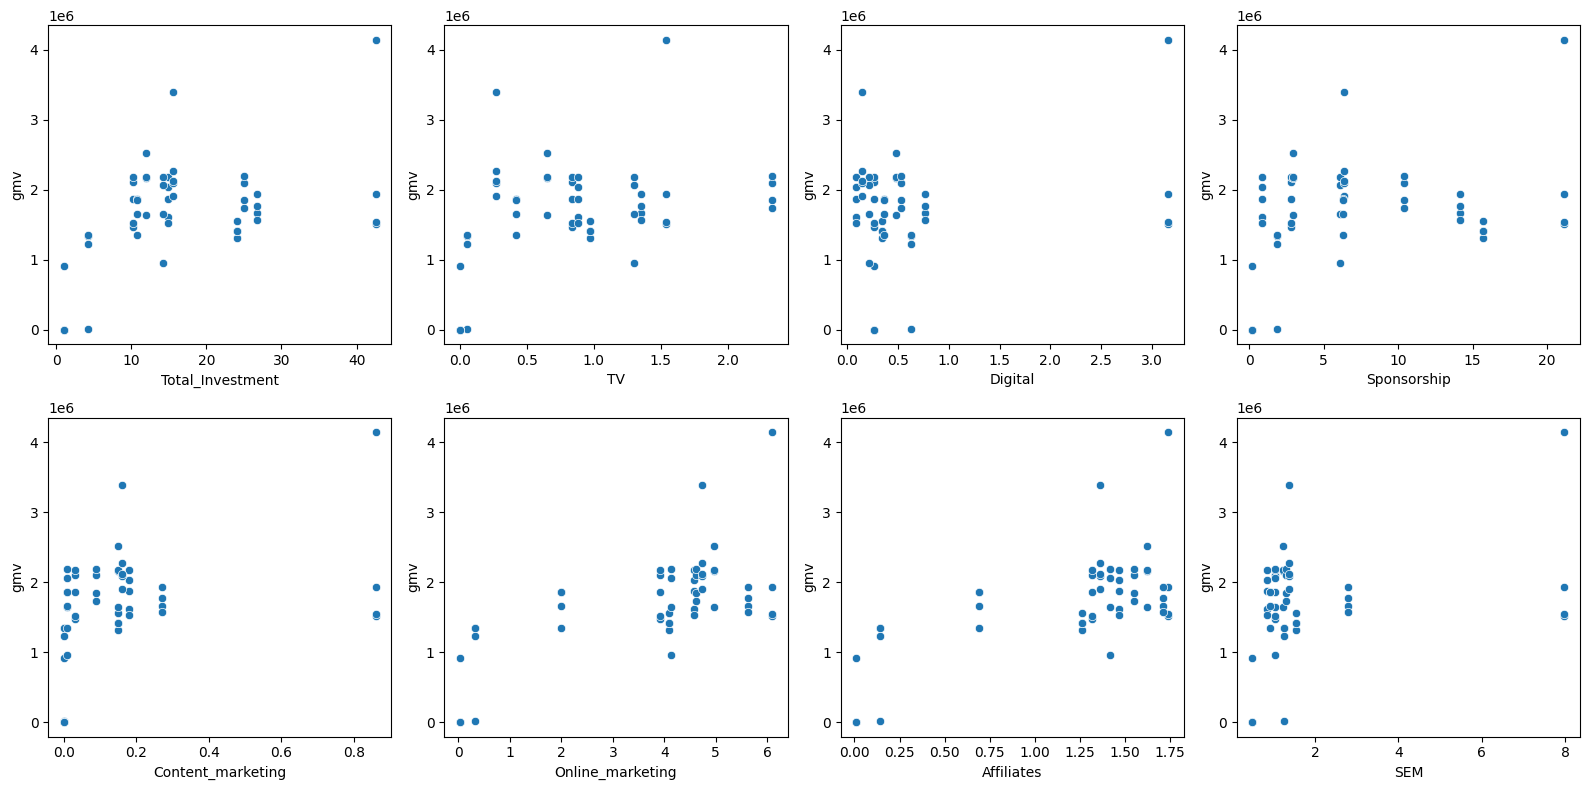

In [152]:
fig, axs = plt.subplots(2,4,figsize=(16,8))

plt1 = sns.scatterplot(x = 'Total_Investment', y = 'gmv', data = ca_week_viz, ax = axs[0,0])

plt2 = sns.scatterplot(x = 'TV', y = 'gmv', data = ca_week_viz, ax = axs[0,1])

plt3 = sns.scatterplot(x = 'Digital', y = 'gmv', data = ca_week_viz, ax = axs[0,2])

plt4 = sns.scatterplot(x = 'Sponsorship', y = 'gmv', data = ca_week_viz, ax = axs[0,3])

plt5 = sns.scatterplot(x = 'Content_marketing', y = 'gmv', data = ca_week_viz, ax = axs[1,0])

plt6 = sns.scatterplot(x = 'Online_marketing', y = 'gmv', data = ca_week_viz, ax = axs[1,1])

plt7 = sns.scatterplot(x = 'Affiliates', y = 'gmv', data = ca_week_viz, ax = axs[1,2])

plt8 = sns.scatterplot(x = 'SEM', y = 'gmv', data = ca_week_viz, ax = axs[1,3])

plt.tight_layout()

Bivariate Analysis

GMV and Holiday weekly

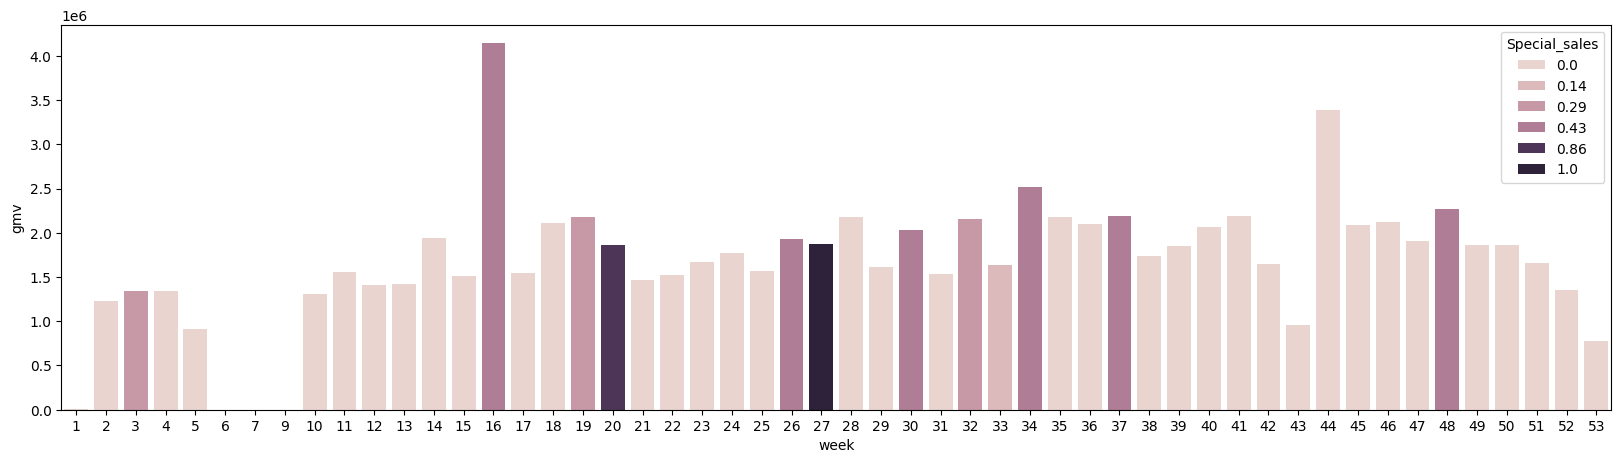

In [153]:
plt.figure(figsize=(20, 5))
sns.barplot(x= ca_week_viz['week'], y =ca_week_viz['gmv'], hue = ca_week_viz['Special_sales'], dodge = False)
plt.show()

GMV and Dicount weekly

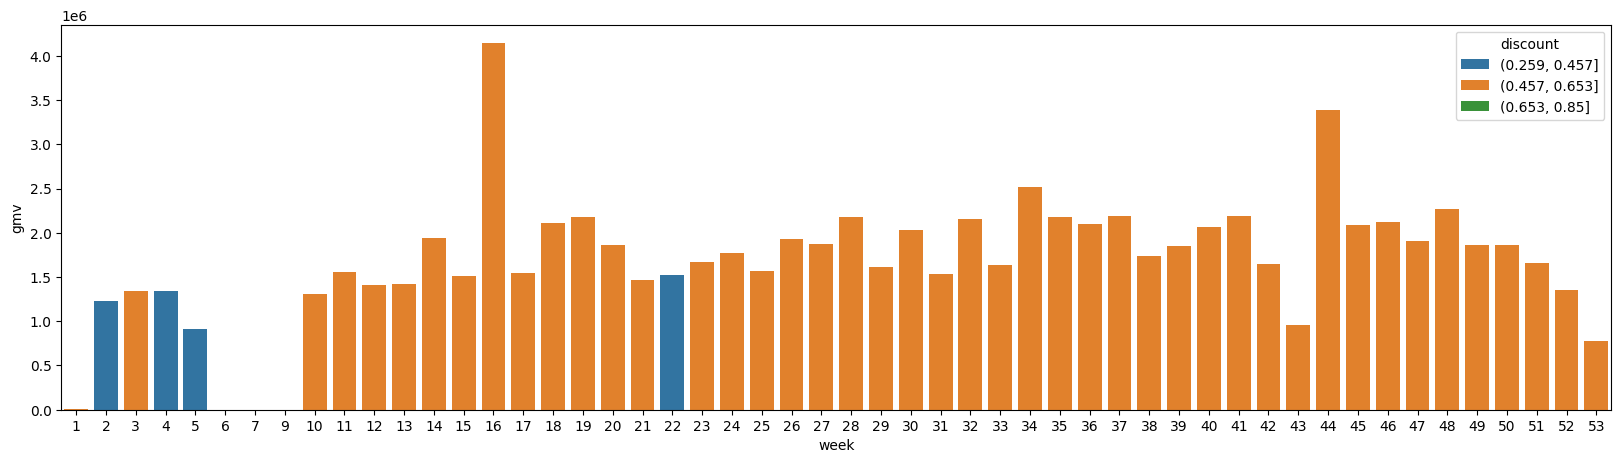

In [154]:
plt.figure(figsize=(20, 5))
sns.barplot(x= ca_week_viz['week'], y =ca_week_viz['gmv'], hue = pd.cut(ca_week_viz['discount'],3), dodge = False)
plt.show()

Camera Accessory - Moving Average

In [155]:
### ca_week

### Moving Average for listing_price and discount

### ca_week = ca_week.sort_values('order_date')

ca_week[['MA2_LP','MA2_Discount']] = ca_week[['listing_price','discount']].rolling(window=2,min_periods=1).mean()
ca_week[['MA3_LP','MA3_Discount']] = ca_week[['listing_price','discount']].rolling(window=3,min_periods=1).mean()
ca_week[['MA4_LP','MA4_Discount']] = ca_week[['listing_price','discount']].rolling(window=4,min_periods=1).mean()

### Reference listed price Inflation 

ca_week['MA2_listed_price'] = (ca_week['listing_price']-ca_week['MA2_LP'])/ca_week['MA2_LP']
ca_week['MA3_listed_price'] = (ca_week['listing_price']-ca_week['MA3_LP'])/ca_week['MA3_LP']
ca_week['MA4_listed_price'] = (ca_week['listing_price']-ca_week['MA4_LP'])/ca_week['MA4_LP']

### Reference discount Inflation

ca_week['MA2_discount_offer'] = (ca_week['discount']-ca_week['MA2_Discount'])/ca_week['MA2_Discount']
ca_week['MA3_discount_offer'] = (ca_week['discount']-ca_week['MA3_Discount'])/ca_week['MA3_Discount']
ca_week['MA4_discount_offer'] = (ca_week['discount']-ca_week['MA4_Discount'])/ca_week['MA4_Discount']


ca_week.drop(['MA2_LP','MA3_LP','MA4_LP','MA2_Discount','MA3_Discount','MA4_Discount'], axis = 1, inplace = True)  
ca_week.head()

week         gmv  listing_price  product_mrp  discount   sla  \
0     1   11151.000        428.885     1121.038     0.491 2.423   
1     2 1228580.000        501.230     1013.379     0.448 7.253   
2     3 1344416.000        512.763     1096.768     0.458 6.567   
3     4 1346986.000        511.973     1086.319     0.445 6.611   
4     5  913445.000        522.839     1085.847     0.443 6.533   

   product_procurement_sla  fsn_id  order_item_id  order_id  \
0                    2.731      20             26        26   
1                    2.578     540           2390      2345   
2                    2.577     538           2570      2539   
3                    2.613     529           2571      2534   
4                    2.614     442           1703      1675   

   order_payment_type  premium_product     AOV  online_order_perc       Date  \
0                  26                0 428.885            100.000 2015-07-05   
1                 753                0 523.915             31.506 2015-07-12   
2                 823                0 529.506             32.023 2015-07-19   
3                 781                0 531.565             30.377 2015-07-26   
4                 470                0 545.340             27.598 2015-08-02   

      Year  Month  Total_Investment    TV  Digital  Sponsorship  \
0 2015.000  7.000             4.265 0.054    0.633        1.854   
1 2015.000  7.000             4.265 0.054    0.633        1.854   
2 2015.000  7.000             4.265 0.054    0.633        1.854   
3 2015.000  7.000             4.265 0.054    0.633        1.854   
4 2015.000  8.000             1.013 0.001    0.256        0.213   

   Content_marketing  Online_marketing  Affiliates   SEM  Radio  Other  \
0              0.000             0.332       0.137 1.256  0.000  0.000   
1              0.000             0.332       0.137 1.256  0.000  0.000   
2              0.000             0.332       0.137 1.256  0.000  0.000   
3              0.000             0.332       0.137 1.256  0.000  0.000   
4              0.000             0.026       0.015 0.503  0.000  0.000   

   TV_ads  Digital_ads  Sponsorship_ads  Content_marketing_ads  \
0   0.054        0.633            1.854                  0.000   
1   0.081        0.950            2.780                  0.000   
2   0.081        0.950            2.780                  0.000   
3   0.081        0.950            2.780                  0.000   
4   0.028        0.572            1.139                  0.000   

   Online_marketing_ads  Affiliates_ads  SEM_ads  Radio_ads  Other_ads    NPS  \
0                 0.332           0.137    1.256      0.000      0.000 54.600   
1                 0.498           0.205    1.884      0.000      0.000 54.600   
2                 0.498           0.205    1.884      0.000      0.000 54.600   
3                 0.498           0.205    1.884      0.000      0.000 54.600   
4                 0.192           0.083    1.131      0.000      0.000 56.139   

   Stock_Index  Special_sales  Payday  max_temp_C  min_temp_C  mean_temp_C  \
0     1177.000          0.000   0.200      25.500      13.200       19.360   
1     1177.000          0.000   0.000      24.025      14.385       19.263   
2     1177.000          0.286   0.143      27.383      16.314       21.906   
3     1177.000          0.000   0.000      28.240      14.342       20.540   
4     1185.286          0.000   0.143      29.811      16.242       23.092   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   total_precip_mm  snow_on_grnd_cm  MA2_listed_price  MA3_listed_price  \
0            0.000            0.000             0.000             0.000  

Camera Accessory - Data Profiling to see multicollinearity and variable distributions

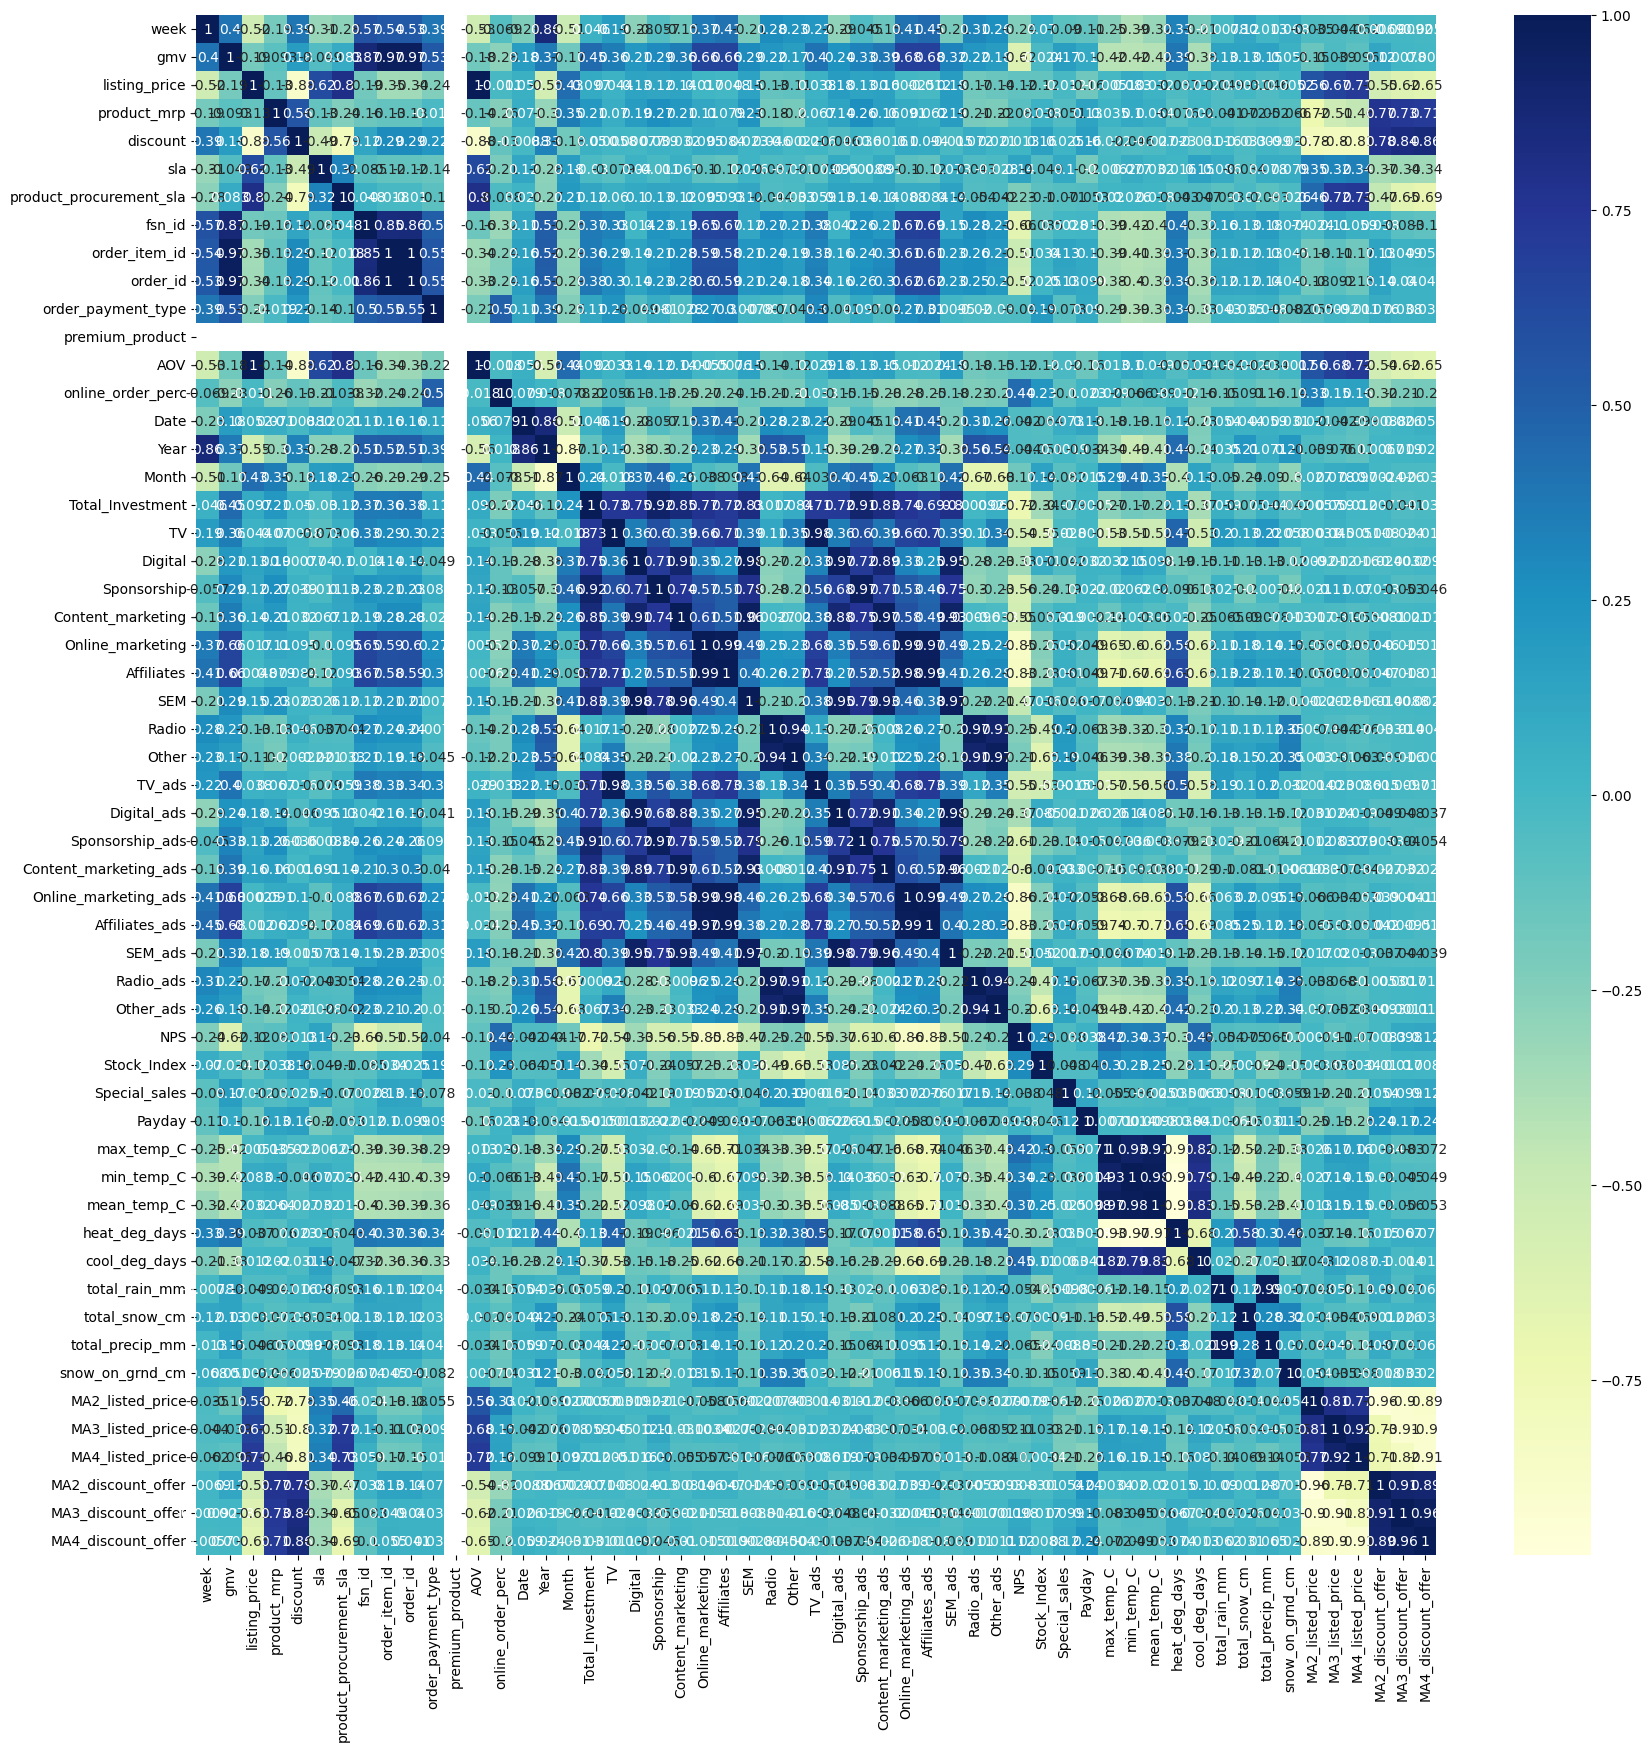

In [156]:
# ### To identify multicollinearity between variable
plt.figure(figsize=(20,20))
sns.heatmap(ca_week.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [157]:
### Highly Correlated Columns should be dropped

ca_week.drop(['TV', 'Digital', 'Sponsorship', 'Content_marketing','Online_marketing', 'Affiliates', 'SEM','Radio',
              'Other'], axis = 1, inplace = True)

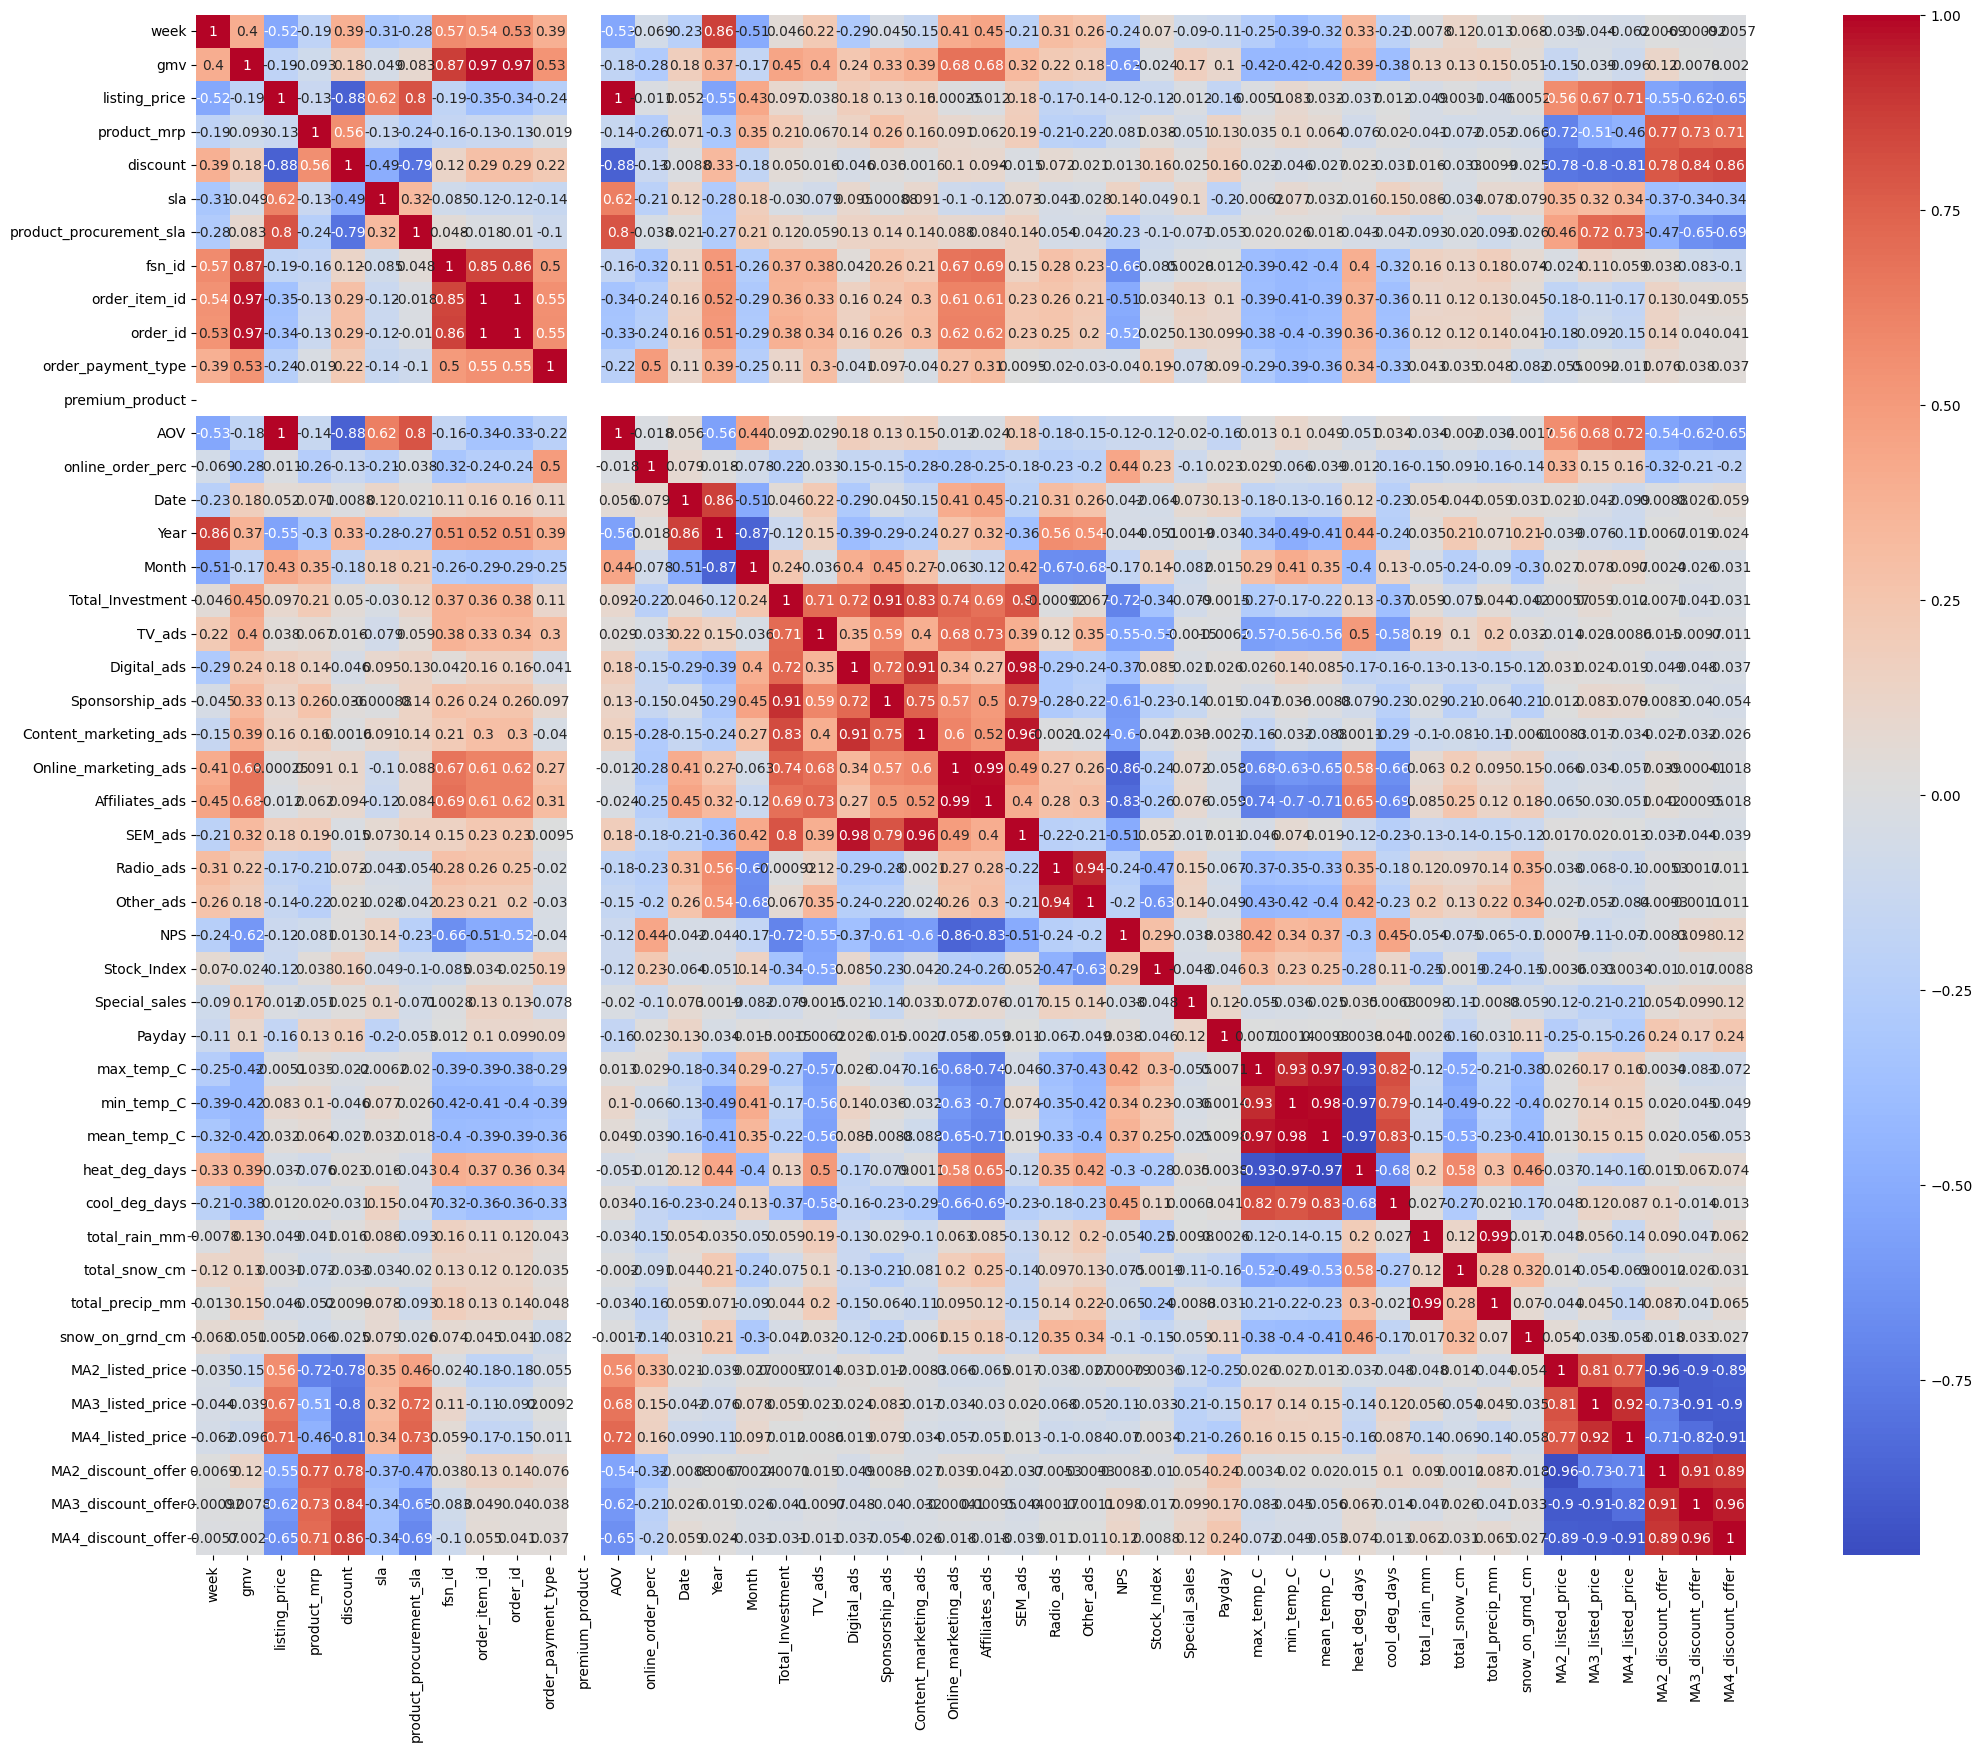

In [158]:
plt.figure(figsize=(25,20))
sns.heatmap(ca_week.corr(), cmap="coolwarm", annot=True)
plt.show()

In [160]:
ca_week.drop(['Affiliates_ads','SEM_ads','Digital_ads','Radio_ads','Other_ads','mean_temp_C','min_temp_C',
              'order_id','order_item_id','total_precip_mm','Total_Investment','MA3_discount_offer',
               'MA3_listed_price','AOV','max_temp_C','MA2_listed_price','MA4_discount_offer'],axis=1,inplace=True)

#Successfully removed more than 90% correlation

Camera Accessory - Lag Variable Functions

In [161]:
### Lag of listed_price, discount_offer, NPS, Special_sales

ca_week['lag_1_listed_price'] = ca_week['listing_price'].shift(-1).fillna(0)
ca_week['lag_2_listed_price'] = ca_week['listing_price'].shift(-2).fillna(0)
ca_week['lag_3_listed_price'] = ca_week['listing_price'].shift(-3).fillna(0)

ca_week['lag_1_discount'] = ca_week['discount'].shift(-1).fillna(0)
ca_week['lag_2_discount'] = ca_week['discount'].shift(-2).fillna(0)
ca_week['lag_3_discount'] = ca_week['discount'].shift(-3).fillna(0)

ca_week['lag_1_Stock_Index'] = ca_week['Stock_Index'].shift(-1).fillna(0)
ca_week['lag_2_Stock_Index'] = ca_week['Stock_Index'].shift(-2).fillna(0)
ca_week['lag_3_Stock_Index'] = ca_week['Stock_Index'].shift(-3).fillna(0)

ca_week['lag_1_Special_sales'] = ca_week['Special_sales'].shift(-1).fillna(0)
ca_week['lag_2_Special_sales'] = ca_week['Special_sales'].shift(-2).fillna(0)
ca_week['lag_3_Special_sales'] = ca_week['Special_sales'].shift(-3).fillna(0)

ca_week['lag_1_Payday'] = ca_week['Payday'].shift(-1).fillna(0)
ca_week['lag_2_Payday'] = ca_week['Payday'].shift(-2).fillna(0)
ca_week['lag_3_Payday'] = ca_week['Payday'].shift(-3).fillna(0)

ca_week['lag_1_NPS'] = ca_week['NPS'].shift(-1).fillna(0)
ca_week['lag_2_NPS'] = ca_week['NPS'].shift(-2).fillna(0)
ca_week['lag_3_NPS'] = ca_week['NPS'].shift(-3).fillna(0)

In [162]:
ca_week.head()

week         gmv  listing_price  product_mrp  discount   sla  \
0     1   11151.000        428.885     1121.038     0.491 2.423   
1     2 1228580.000        501.230     1013.379     0.448 7.253   
2     3 1344416.000        512.763     1096.768     0.458 6.567   
3     4 1346986.000        511.973     1086.319     0.445 6.611   
4     5  913445.000        522.839     1085.847     0.443 6.533   

   product_procurement_sla  fsn_id  order_payment_type  premium_product  \
0                    2.731      20                  26                0   
1                    2.578     540                 753                0   
2                    2.577     538                 823                0   
3                    2.613     529                 781                0   
4                    2.614     442                 470                0   

   online_order_perc       Date     Year  Month  TV_ads  Sponsorship_ads  \
0            100.000 2015-07-05 2015.000  7.000   0.054            1.854   
1             31.506 2015-07-12 2015.000  7.000   0.081            2.780   
2             32.023 2015-07-19 2015.000  7.000   0.081            2.780   
3             30.377 2015-07-26 2015.000  7.000   0.081            2.780   
4             27.598 2015-08-02 2015.000  8.000   0.028            1.139   

   Content_marketing_ads  Online_marketing_ads    NPS  Stock_Index  \
0                  0.000                 0.332 54.600     1177.000   
1                  0.000                 0.498 54.600     1177.000   
2                  0.000                 0.498 54.600     1177.000   
3                  0.000                 0.498 54.600     1177.000   
4                  0.000                 0.192 56.139     1185.286   

   Special_sales  Payday  heat_deg_days  cool_deg_days  total_rain_mm  \
0          0.000   0.200          0.100          1.460          0.000   
1          0.000   0.000          1.059          2.322          4.155   
2          0.286   0.143          0.816          4.722          1.569   
3          0.000   0.000          1.632          4.172          1.141   
4          0.000   0.143          0.816          5.908          4.341   

   total_snow_cm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  \
0          0.000            0.000             0.000               0.000   
1          0.029            0.041             0.078              -0.046   
2          0.029            0.041             0.066               0.011   
3          0.029            0.041             0.048              -0.014   
4          0.029            0.041             0.021              -0.002   

   lag_1_listed_price  lag_2_listed_price  lag_3_listed_price  lag_1_discount  \
0             501.230             512.763             511.973           0.448   
1             512.763             511.973             522.839           0.458   
2             511.973             522.839             749.000           0.445   
3             522.839             749.000             299.000           0.443   
4             749.000             299.000             452.500           0.260   

   lag_2_discount  lag_3_discount  lag_1_Stock_Index  lag_2_Stock_Index  \
0           0.458           0.445           1177.000           1177.000   
1           0.445           0.443           1177.000           1177.000   
2           0.443           0.260           1177.000           1185.286   
3           0.260           0.850           1185.286           1206.000   
4           0.850           0.475           1206.000           1206.000   

   lag_3_Stock_Index  lag_1_Special_sales  lag_2_Special_sales  \
0           1177.000                0.000                0.286   
1           1185.286                0.286                0.000   
2           1206.000                0.000                0.000   
3           1206.000                0.000                0.000   
4           1206.000                0.000                0.286   

   lag_3_Special_sales  lag_1_Payday  lag_2_Pa

2. Gaming Sub Category

In [163]:
gaming_accessory = consumer[consumer['product_analytic_sub_category'] == 'GamingAccessory']

###  Removing outliers is important as
###  1. There may be some garbage value.
###  2. Bulk orders can skew the analysis

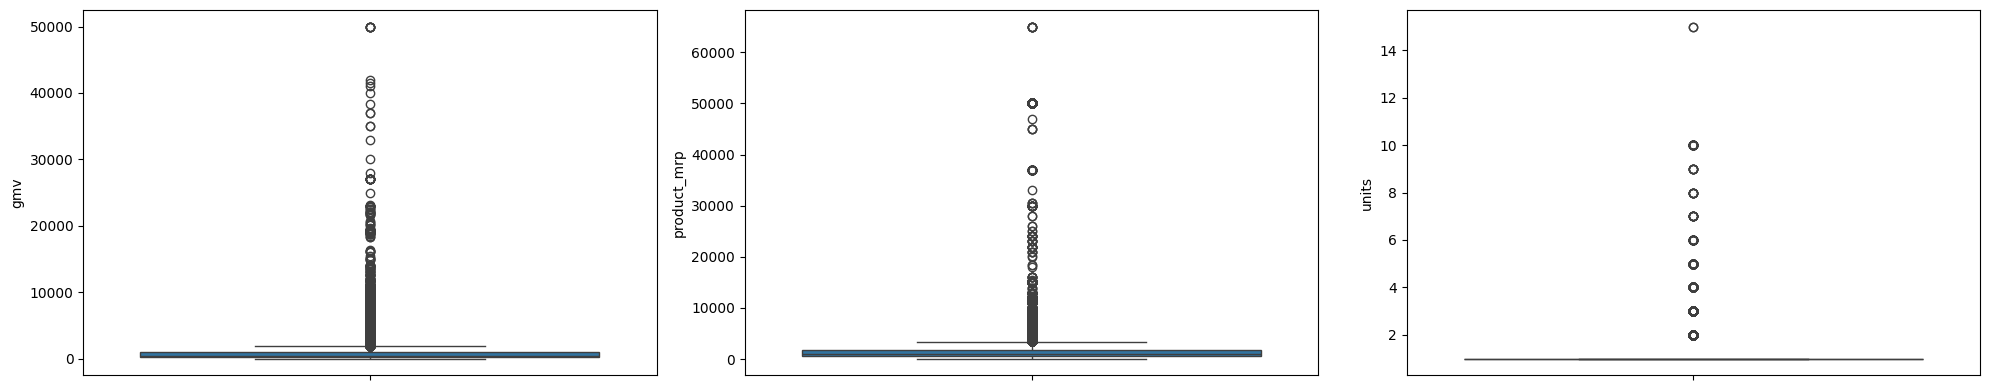

In [164]:
### Outlier Analysis
fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(gaming_accessory['gmv'], ax = axs[0])
plt2 = sns.boxplot(gaming_accessory['units'], ax = axs[2])
plt4 = sns.boxplot(gaming_accessory['product_mrp'], ax = axs[1])
plt.tight_layout()

In [165]:
### Treating outliers
### Outlier treatment for gmv & product_mrp
Q1 = gaming_accessory.gmv.quantile(0.25)
Q3 = gaming_accessory.gmv.quantile(0.75)
IQR = Q3 - Q1
gaming_accessory = gaming_accessory[(gaming_accessory.gmv >= Q1 - 1.5*IQR) & (gaming_accessory.gmv <= Q3 + 1.5*IQR)]
Q1 = gaming_accessory.product_mrp.quantile(0.25)
Q3 = gaming_accessory.product_mrp.quantile(0.75)
IQR = Q3 - Q1
gaming_accessory = gaming_accessory[(gaming_accessory.product_mrp >= Q1 - 1.5*IQR) & (gaming_accessory.product_mrp <= Q3 + 1.5*IQR)]

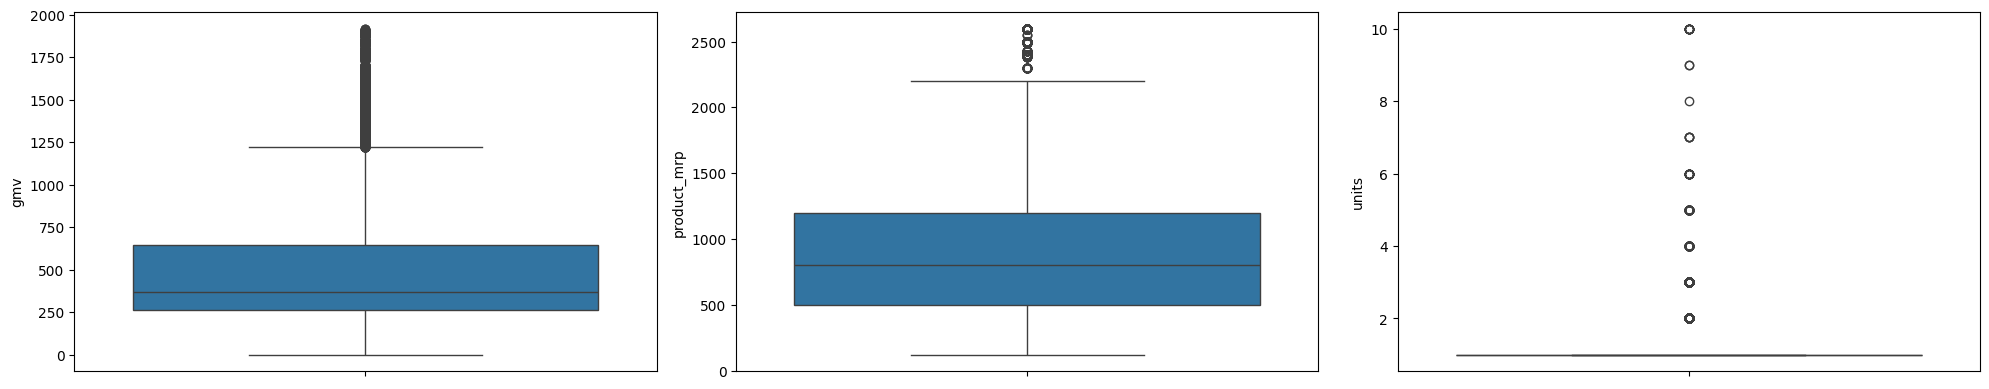

In [166]:
### Outlier Analysis
fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(gaming_accessory['gmv'], ax = axs[0])
plt2 = sns.boxplot(gaming_accessory['units'], ax = axs[2])
plt4 = sns.boxplot(gaming_accessory['product_mrp'], ax = axs[1])
plt.tight_layout()

In [167]:
gaming_accessory.columns


Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_mrp', 'product_procurement_sla', 'listing_price', 'discount',
       'Order_Item_Value', 'week', 'premium_product'],
      dtype='object')

In [168]:
### Aggregating dataset on weekly level

ga_week = pd.DataFrame(gaming_accessory.groupby('week').agg({'gmv':'sum','listing_price':'mean',
                                                             'product_mrp':'mean','discount':'mean',
                                                             'sla':'mean','product_procurement_sla':'mean',
                                                             'fsn_id':pd.Series.nunique,'order_item_id':pd.Series.nunique,
                                                             'order_id': pd.Series.nunique,
                                                             'order_payment_type':'sum'}))

ga_week.reset_index( inplace = True)

In [169]:
ga_week.head()

week         gmv  listing_price  product_mrp  discount   sla  \
0     1   17466.000        681.080      898.440     0.220 2.960   
1     2 1435300.000        528.929      963.907     0.414 5.170   
2     3 1097388.359        449.826      759.691     0.429 5.115   
3     4 1158166.000        559.134      889.058     0.352 5.179   
4     5  742062.000        554.214      886.076     0.363 5.552   

   product_procurement_sla  fsn_id  order_item_id  order_id  \
0                    2.560      19             25        25   
1                    3.013     211           2629      2494   
2                    2.514     216           2382      2356   
3                    2.338     232           2023      1990   
4                    2.325     224           1303      1287   

   order_payment_type  
0                  25  
1                 689  
2                 534  
3                 425  
4                 246